# Showing the reason for not using 33L dataset and going for Sample Dataset

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\train.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370528 entries, 0 to 3370527
Data columns (total 15 columns):
 #   Column                               Dtype 
---  ------                               ----- 
 0   PostId                               int64 
 1   PostCreationDate                     object
 2   OwnerUserId                          int64 
 3   OwnerCreationDate                    object
 4   ReputationAtPostCreation             int64 
 5   OwnerUndeletedAnswerCountAtPostTime  int64 
 6   Title                                object
 7   BodyMarkdown                         object
 8   Tag1                                 object
 9   Tag2                                 object
 10  Tag3                                 object
 11  Tag4                                 object
 12  Tag5                                 object
 13  PostClosedDate                       object
 14  OpenStatus                           object
dtypes: int64(4), object(11)
memory usage: 385.7+ MB


In [29]:
df.head()

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,4,07/31/2008 21:42:52,8,07/31/2008 21:33:24,1,0,Decimal vs Double?,"I'm new to C#, and I want to use a trackbar fo...",c#,NaN,NaN,NaN,NaN,NaN,open
1,6,07/31/2008 22:08:08,9,07/31/2008 21:35:26,1,0,Percentage width child in absolutely positione...,I've got an absolutely positioned div containi...,html,css,NaN,NaN,NaN,NaN,open
2,8,07/31/2008 23:33:19,9,07/31/2008 21:35:26,16,1,Tools for porting J# code to C#,Are there any conversion tools for porting Vis...,j#,NaN,NaN,NaN,NaN,NaN,open
3,9,07/31/2008 23:40:59,1,07/31/2008 14:22:31,1,1,How do I calculate someone's age in c#?,"Given a DateTime representing their birthday, ...",c#,NaN,NaN,NaN,NaN,NaN,open
4,9610539,03/07/2012 23:07:09,1021610,10/31/2011 08:26:49,29,0,retrieve data from NSUserDefaults to TableView,I save values of two labels through NSUserDefa...,iphone,objective-c,ios5,NaN,NaN,NaN,open


In [30]:
df.isnull().sum()

PostId                                       0
PostCreationDate                             0
OwnerUserId                                  0
OwnerCreationDate                            0
ReputationAtPostCreation                     0
OwnerUndeletedAnswerCountAtPostTime          0
Title                                        0
BodyMarkdown                                 1
Tag1                                       160
Tag2                                    525174
Tag3                                   1389204
Tag4                                   2328489
Tag5                                   2965559
PostClosedDate                         3300392
OpenStatus                                   0
dtype: int64

In [31]:
len_open=len(df.OpenStatus[df.OpenStatus=='open'])
len_close=len(df)-len_open
print("No. of Open status:",len_open)
print("No. of Close Status:",len_close)
print("Percentage of open status of whole dataset:",(len_open/len(df))*100,"%")
print("Percentage of close status of whole dataset:",(len_close/len(df))*100,"%")

No. of Open status: 3300392
No. of Close Status: 70136
Percentage of open status of whole dataset: 97.91913907850639 %
Percentage of close status of whole dataset: 2.080860921493606 %


In [32]:
df=df.dropna(subset=["BodyMarkdown"],axis=0)

In [33]:
df.isnull().sum()

PostId                                       0
PostCreationDate                             0
OwnerUserId                                  0
OwnerCreationDate                            0
ReputationAtPostCreation                     0
OwnerUndeletedAnswerCountAtPostTime          0
Title                                        0
BodyMarkdown                                 0
Tag1                                       160
Tag2                                    525174
Tag3                                   1389203
Tag4                                   2328488
Tag5                                   2965558
PostClosedDate                         3300391
OpenStatus                                   0
dtype: int64

In [34]:
len_open=len(df.OpenStatus[df.OpenStatus=='open'])
len_close=len(df)-len_open
print("No. of Open status:",len_open)
print("No. of Close Status:",len_close)
print("Percentage of open status of whole dataset:",(len_open/len(df))*100,"%")
print("Percentage of close status of whole dataset:",(len_close/len(df))*100,"%")

No. of Open status: 3300391
No. of Close Status: 70136
Percentage of open status of whole dataset: 97.9191384611368 %
Percentage of close status of whole dataset: 2.0808615388632106 %


In [35]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\train-sample.csv\train-sample.csv")

In [36]:
df.isnull().sum()

PostId                                      0
PostCreationDate                            0
OwnerUserId                                 0
OwnerCreationDate                           0
ReputationAtPostCreation                    0
OwnerUndeletedAnswerCountAtPostTime         0
Title                                       0
BodyMarkdown                                0
Tag1                                       10
Tag2                                    27251
Tag3                                    64358
Tag4                                   100622
Tag5                                   124558
PostClosedDate                          70136
OpenStatus                                  0
dtype: int64

In [37]:
len_open=len(df.OpenStatus[df.OpenStatus=='open'])
len_close=len(df)-len_open
print("No. of Open status:",len_open)
print("No. of Close Status:",len_close)
print("Percentage of open status of whole dataset:",(len_open/len(df))*100,"%")
print("Percentage of close status of whole dataset:",(len_close/len(df))*100,"%")

No. of Open status: 70136
No. of Close Status: 70136
Percentage of open status of whole dataset: 50.0 %
Percentage of close status of whole dataset: 50.0 %


# Creating tokens without stop words and getting top words based on Count

In [50]:
import pandas as pd
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords and tokenizer (only needed once)
nltk.download("stopwords")
nltk.download("punkt_tab")
nltk.download("punkt")

# File path
file_path = r"C:\Users\ASUS\Labs\NLP\Project\train-sample.csv\train-sample.csv"

# selecting only relevant columns
df = pd.read_csv(file_path, usecols=["Title", "BodyMarkdown"])

# Combine Title and BodyMarkdown into one text field
df["text"] = df["Title"].astype(str) + " " + df["BodyMarkdown"].astype(str)

# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\W+", " ", text)  # Remove special characters & punctuation
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stopwords.words("english")]  # Remove stopwords
    return words

# Apply preprocessing
df["tokens"] = df["text"].apply(preprocess_text)

# Build Vocabulary
vocab = Counter()
for tokens in df["tokens"]:
    tokens=ast.literal_eval(tokens)
    vocab.update(tokens)

# Print Vocabulary Size
print(f"Vocabulary Size: {len(vocab)}")

# Print Most Common Words
print("Most Common Words:", vocab.most_common(20))


Vocabulary Size: 411272
Most Common Words: [('1', 116406), ('0', 100576), ('2', 64041), ('using', 59058), ('code', 57381), ('new', 55681), ('like', 53264), ('c', 51703), ('java', 48905), ('get', 47378), ('class', 46101), ('com', 45630), ('file', 45532), ('http', 44910), ('use', 43750), ('want', 43719), ('data', 41971), ('id', 41814), ('name', 41737), ('would', 41692)]


In [14]:
df.to_csv("tokens_sample_train.csv",index=False)

In [19]:
vocab

Counter({'1': 116406,
         '0': 100576,
         '2': 64041,
         'using': 59058,
         'code': 57381,
         'new': 55681,
         'like': 53264,
         'c': 51703,
         'java': 48905,
         'get': 47378,
         'class': 46101,
         'com': 45630,
         'file': 45532,
         'http': 44910,
         'use': 43750,
         'want': 43719,
         'data': 41971,
         'id': 41814,
         'name': 41737,
         'would': 41692,
         'string': 41043,
         '3': 39047,
         'php': 36607,
         'one': 36531,
         'int': 35266,
         'error': 35119,
         'function': 35066,
         'android': 34032,
         'value': 32979,
         'public': 32781,
         'thanks': 32264,
         'need': 32188,
         'text': 32060,
         'user': 31480,
         'know': 30651,
         'server': 30335,
         'application': 29394,
         'way': 29029,
         'type': 28509,
         'return': 28346,
         'system': 27786,
        

# Bag of Words, Its Matrix and showing Sparsity

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import ast
import pandas as pd
df=pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\tokens_sample_train.csv")
def string_text(tokens):
    tokens=ast.literal_eval(tokens)
    return " ".join(tokens)

df['clean_text']=df["tokens"].apply(string_text)
vectorizer = CountVectorizer(max_features=10000)

# Fit and transform the text data
X_bow = vectorizer.fit_transform(df["clean_text"])

# Convert to DataFrame
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Print shape of BoW matrix
print(f"BoW Matrix Shape: {bow_df.shape}")

# Print sample BoW features
print("Sample BoW representation:")
print(bow_df.head())

# Check sparsity (percentage of zeros)
sparsity = (bow_df.to_numpy() == 0).sum() / bow_df.size * 100
print(f"Sparsity: {sparsity:.2f}%")

BoW Matrix Shape: (140272, 10000)
Sample BoW representation:
   00  000  0000  000000  00000000  0000000000000000  00000001  0000ff  0001  \
0   0    0     0       0         0                 0         0       0     0   
1   0    0     0       0         0                 0         0       0     0   
2   0    0     0       0         0                 0         0       0     0   
3   0    0     0       0         0                 0         0       0     0   
4   0    0     0       0         0                 0         0       0     0   

   001  ...  zlib  zombie  zone  zones  zoom  zooming  zsoa  zurich  \
0    0  ...     0       0     0      0     0        0     0       0   
1    0  ...     0       0     0      0     0        0     0       0   
2    0  ...     0       0     0      0     0        0     0       0   
3    0  ...     0       0     0      0     0        0     0       0   
4    0  ...     0       0     0      0     0        0     0       0   

   zygoteinit  âldapobjectâ  
0

# TF IDF, Its Matrix and showing Sparsity

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import ast
df=pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\tokens_sample_train.csv")
def string_text(tokens):
    tokens=ast.literal_eval(tokens)
    return " ".join(tokens)

df['clean_text']=df["tokens"].apply(string_text)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df["clean_text"])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print shape of TF-IDF matrix
print(f"TF-IDF Matrix Shape: {tfidf_df.shape}")

# Print sample TF-IDF representation
print("Sample TF-IDF representation:")
print(tfidf_df.head())

# Check sparsity (percentage of zeros)
sparsity = (tfidf_df.to_numpy() == 0).sum() / tfidf_df.size * 100
print(f"Sparsity: {sparsity:.2f}%")

TF-IDF Matrix Shape: (140272, 10000)
Sample TF-IDF representation:
    00  000  0000  000000  00000000  0000000000000000  00000001  0000ff  0001  \
0  0.0  0.0   0.0     0.0       0.0               0.0       0.0     0.0   0.0   
1  0.0  0.0   0.0     0.0       0.0               0.0       0.0     0.0   0.0   
2  0.0  0.0   0.0     0.0       0.0               0.0       0.0     0.0   0.0   
3  0.0  0.0   0.0     0.0       0.0               0.0       0.0     0.0   0.0   
4  0.0  0.0   0.0     0.0       0.0               0.0       0.0     0.0   0.0   

   001  ...  zlib  zombie  zone  zones  zoom  zooming  zsoa  zurich  \
0  0.0  ...   0.0     0.0   0.0    0.0   0.0      0.0   0.0     0.0   
1  0.0  ...   0.0     0.0   0.0    0.0   0.0      0.0   0.0     0.0   
2  0.0  ...   0.0     0.0   0.0    0.0   0.0      0.0   0.0     0.0   
3  0.0  ...   0.0     0.0   0.0    0.0   0.0      0.0   0.0     0.0   
4  0.0  ...   0.0     0.0   0.0    0.0   0.0      0.0   0.0     0.0   

   zygoteinit  âlda

# TFIDF AND BAG OF WORDS MULTICLASS CLASSIFICATION Using 10000 Features

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import ast

# Load the dataset
df = pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\tokens_sample_train.csv")

# Convert token lists to strings
def string_text(tokens):
    tokens = ast.literal_eval(tokens)
    return " ".join(tokens)

df['clean_text'] = df["tokens"].apply(string_text)

# Vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(df["clean_text"])

bow_vectorizer = CountVectorizer(max_features=10000)
X_bow = bow_vectorizer.fit_transform(df["clean_text"])

y = df["OpenStatus"]  

# Split once for both models
X_train_tfidf, X_test_tfidf, y_train, y_test, df_train, df_test = train_test_split(
    X_tfidf, y, df, test_size=0.2, random_state=42
)

X_train_bow, X_test_bow, _, _, _, _ = train_test_split(
    X_bow, y, df, test_size=0.2, random_state=42
)

# -------------------- TF-IDF Logistic Regression --------------------
log_reg_tfidf = LogisticRegression(max_iter=1000, random_state=42)
log_reg_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"\nTF-IDF Logistic Regression Accuracy: {accuracy_tfidf:.4f}")

# Save misclassifications (TF-IDF)
misclassified_tfidf = []

for idx, (pred, actual) in enumerate(zip(y_pred_tfidf, y_test)):
    if pred != actual:
        row = df_test.iloc[idx]
        misclassified_tfidf.append({
            "Index": row.name,
            "True_Label": actual,
            "Predicted_Label": pred,
            "Title": row.get("Title", ""),
            "BodyMarkdown": row.get("BodyMarkdown", "")
        })

misclassified_df_tfidf = pd.DataFrame(misclassified_tfidf)
misclassified_df_tfidf.to_csv("misclassified_tfidf_logistic.csv", index=False)
print(f"Saved {len(misclassified_df_tfidf)} TF-IDF misclassified cases to 'misclassified_tfidf_logistic.csv'")


# -------------------- BoW Logistic Regression --------------------
log_reg_bow = LogisticRegression(max_iter=1000, random_state=42)
log_reg_bow.fit(X_train_bow, y_train)
y_pred_bow = log_reg_bow.predict(X_test_bow)

accuracy_bow = accuracy_score(y_test, y_pred_bow)
print(f"\nBoW Logistic Regression Accuracy: {accuracy_bow:.4f}")

# Save misclassifications (BoW)
misclassified_bow = []

for idx, (pred, actual) in enumerate(zip(y_pred_bow, y_test)):
    if pred != actual:
        row = df_test.iloc[idx]
        misclassified_bow.append({
            "Index": row.name,
            "True_Label": actual,
            "Predicted_Label": pred,
            "Title": row.get("Title", ""),
            "BodyMarkdown": row.get("BodyMarkdown", "")
        })

misclassified_df_bow = pd.DataFrame(misclassified_bow)
misclassified_df_bow.to_csv("misclassified_bow_logistic.csv", index=False)
print(f"Saved {len(misclassified_df_bow)} BoW misclassified cases to 'misclassified_bow_logistic.csv'")



TF-IDF Logistic Regression Accuracy: 0.6334
Saved 10286 TF-IDF misclassified cases to 'misclassified_tfidf_logistic.csv'

BoW Logistic Regression Accuracy: 0.5915
Saved 11461 BoW misclassified cases to 'misclassified_bow_logistic.csv'


# TFIDF AND BAG OF WORDS MULTICLASS CLASSIFICATION Using All Features

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import ast

# Load the dataset
df = pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\tokens_sample_train.csv")

# Convert token lists to strings
def string_text(tokens):
    tokens = ast.literal_eval(tokens)
    return " ".join(tokens)

df['clean_text'] = df["tokens"].apply(string_text)

# Vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df["clean_text"])

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df["clean_text"])

y = df["OpenStatus"]  

# Split once for both models
X_train_tfidf, X_test_tfidf, y_train, y_test, df_train, df_test = train_test_split(
    X_tfidf, y, df, test_size=0.2, random_state=42
)

X_train_bow, X_test_bow, _, _, _, _ = train_test_split(
    X_bow, y, df, test_size=0.2, random_state=42
)

# -------------------- TF-IDF Logistic Regression --------------------
log_reg_tfidf = LogisticRegression(max_iter=1000, random_state=42)
log_reg_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"\nTF-IDF Logistic Regression Accuracy: {accuracy_tfidf:.4f}")

# Save misclassifications (TF-IDF)
misclassified_tfidf = []

for idx, (pred, actual) in enumerate(zip(y_pred_tfidf, y_test)):
    if pred != actual:
        row = df_test.iloc[idx]
        misclassified_tfidf.append({
            "Index": row.name,
            "True_Label": actual,
            "Predicted_Label": pred,
            "Title": row.get("Title", ""),
            "BodyMarkdown": row.get("BodyMarkdown", "")
        })

misclassified_df_tfidf = pd.DataFrame(misclassified_tfidf)
misclassified_df_tfidf.to_csv("misclassified_tfidf_logistic_multi_all.csv", index=False)
print(f"Saved {len(misclassified_df_tfidf)} TF-IDF misclassified cases to 'misclassified_tfidf_logistic.csv'")


# -------------------- BoW Logistic Regression --------------------
log_reg_bow = LogisticRegression(max_iter=1000, random_state=42)
log_reg_bow.fit(X_train_bow, y_train)
y_pred_bow = log_reg_bow.predict(X_test_bow)

accuracy_bow = accuracy_score(y_test, y_pred_bow)
print(f"\nBoW Logistic Regression Accuracy: {accuracy_bow:.4f}")

# Save misclassifications (BoW)
misclassified_bow = []

for idx, (pred, actual) in enumerate(zip(y_pred_bow, y_test)):
    if pred != actual:
        row = df_test.iloc[idx]
        misclassified_bow.append({
            "Index": row.name,
            "True_Label": actual,
            "Predicted_Label": pred,
            "Title": row.get("Title", ""),
            "BodyMarkdown": row.get("BodyMarkdown", "")
        })

misclassified_df_bow = pd.DataFrame(misclassified_bow)
misclassified_df_bow.to_csv("misclassified_bow_logistic_multi_all.csv", index=False)
print(f"Saved {len(misclassified_df_bow)} BoW misclassified cases to 'misclassified_bow_logistic.csv'")



TF-IDF Logistic Regression Accuracy: 0.6327
Saved 10306 TF-IDF misclassified cases to 'misclassified_tfidf_logistic.csv'

BoW Logistic Regression Accuracy: 0.5889
Saved 11533 BoW misclassified cases to 'misclassified_bow_logistic.csv'


# TFIDF AND BAG OF WORDS BINARY CLASSIFICATION Using 10000 Features

In [42]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\tokens_sample_train.csv")

# Convert tokens from string to space-separated string
def string_text(tokens):
    tokens = ast.literal_eval(tokens)
    return " ".join(tokens)

df['clean_text'] = df['tokens'].apply(string_text)

# Binary target: OpenStatus (open vs closed)
df['OpenStatus_binary'] = df['OpenStatus'].apply(lambda x: 1 if x == 'open' else 0)
y = df['OpenStatus_binary']

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

# BoW vectorization
bow_vectorizer = CountVectorizer(max_features=10000)
X_bow = bow_vectorizer.fit_transform(df['clean_text'])

# Train-test split
X_train_tfidf, X_test_tfidf, y_train, y_test, df_train, df_test = train_test_split(
    X_tfidf, y, df, test_size=0.2, random_state=42
)

X_train_bow, X_test_bow, _, _, _, _ = train_test_split(
    X_bow, y, df, test_size=0.2, random_state=42
)

# -------------------- TF-IDF Logistic Regression --------------------
log_reg_tfidf = LogisticRegression(max_iter=1000, random_state=42)
log_reg_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"TF-IDF Logistic Regression Accuracy: {acc_tfidf:.4f}")

# Misclassifications
misclassified_tfidf = []
for idx, (pred, actual) in enumerate(zip(y_pred_tfidf, y_test)):
    if pred != actual:
        row = df_test.iloc[idx]
        misclassified_tfidf.append({
            "Index": row.name,
            "True_Label": actual,
            "Predicted_Label": pred,
            "Title": row.get("Title", ""),
            "BodyMarkdown": row.get("BodyMarkdown", "")
        })

pd.DataFrame(misclassified_tfidf).to_csv("misclassified_tfidf_binary.csv", index=False)
print(f"Saved {len(misclassified_tfidf)} misclassified TF-IDF samples.")


# -------------------- BoW Logistic Regression --------------------
log_reg_bow = LogisticRegression(max_iter=1000, random_state=42)
log_reg_bow.fit(X_train_bow, y_train)
y_pred_bow = log_reg_bow.predict(X_test_bow)
acc_bow = accuracy_score(y_test, y_pred_bow)
print(f"BoW Logistic Regression Accuracy: {acc_bow:.4f}")

# Misclassifications
misclassified_bow = []
for idx, (pred, actual) in enumerate(zip(y_pred_bow, y_test)):
    if pred != actual:
        row = df_test.iloc[idx]
        misclassified_bow.append({
            "Index": row.name,
            "True_Label": actual,
            "Predicted_Label": pred,
            "Title": row.get("Title", ""),
            "BodyMarkdown": row.get("BodyMarkdown", "")
        })

pd.DataFrame(misclassified_bow).to_csv("misclassified_bow_binary.csv", index=False)
print(f"Saved {len(misclassified_bow)} misclassified BoW samples.")


TF-IDF Logistic Regression Accuracy: 0.7400
Saved 7294 misclassified TF-IDF samples.
BoW Logistic Regression Accuracy: 0.7203
Saved 7848 misclassified BoW samples.


# TFIDF AND BAG OF WORDS BINARY CLASSIFICATION Using ALL Features

In [40]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\tokens_sample_train.csv")

# Convert tokens from string to space-separated text
def string_text(tokens):
    tokens = ast.literal_eval(tokens)
    return " ".join(tokens)

df['clean_text'] = df['tokens'].apply(string_text)

# Binary target: OpenStatus (open = 1, else = 0)
df['OpenStatus_binary'] = df['OpenStatus'].apply(lambda x: 1 if x == 'open' else 0)
y = df['OpenStatus_binary']

# Vectorize without limiting features
tfidf_vectorizer = TfidfVectorizer()  # Removed max_features
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

bow_vectorizer = CountVectorizer()  # Removed max_features
X_bow = bow_vectorizer.fit_transform(df['clean_text'])

# Train-test split
X_train_tfidf, X_test_tfidf, y_train, y_test, df_train, df_test = train_test_split(
    X_tfidf, y, df, test_size=0.2, random_state=42
)

X_train_bow, X_test_bow, _, _, _, _ = train_test_split(
    X_bow, y, df, test_size=0.2, random_state=42
)

# -------------------- TF-IDF Logistic Regression --------------------
log_reg_tfidf = LogisticRegression(max_iter=1000, random_state=42)
log_reg_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"TF-IDF Logistic Regression Accuracy: {acc_tfidf:.4f}")

# Save TF-IDF Misclassifications
misclassified_tfidf = []
for idx, (pred, actual) in enumerate(zip(y_pred_tfidf, y_test)):
    if pred != actual:
        row = df_test.iloc[idx]
        misclassified_tfidf.append({
            "Index": row.name,
            "True_Label": actual,
            "Predicted_Label": pred,
            "Title": row.get("Title", ""),
            "BodyMarkdown": row.get("BodyMarkdown", "")
        })

pd.DataFrame(misclassified_tfidf).to_csv("misclassified_tfidf_binary_all_features.csv", index=False)
print(f"Saved {len(misclassified_tfidf)} misclassified TF-IDF samples.")

# -------------------- BoW Logistic Regression --------------------
log_reg_bow = LogisticRegression(max_iter=1000, random_state=42)
log_reg_bow.fit(X_train_bow, y_train)
y_pred_bow = log_reg_bow.predict(X_test_bow)
acc_bow = accuracy_score(y_test, y_pred_bow)
print(f"BoW Logistic Regression Accuracy: {acc_bow:.4f}")

# Save BoW Misclassifications
misclassified_bow = []
for idx, (pred, actual) in enumerate(zip(y_pred_bow, y_test)):
    if pred != actual:
        row = df_test.iloc[idx]
        misclassified_bow.append({
            "Index": row.name,
            "True_Label": actual,
            "Predicted_Label": pred,
            "Title": row.get("Title", ""),
            "BodyMarkdown": row.get("BodyMarkdown", ""),
            "Tags_combined": row.get("Tags_combined", ""),
            "CodeSnippets": row.get("CodeSnippets", "")
        })

pd.DataFrame(misclassified_bow).to_csv("misclassified_bow_binary_all_features.csv", index=False)
print(f"Saved {len(misclassified_bow)} misclassified BoW samples.")


TF-IDF Logistic Regression Accuracy: 0.7351
Saved 7433 misclassified TF-IDF samples.
BoW Logistic Regression Accuracy: 0.7148
Saved 8001 misclassified BoW samples.


# WORD2VEC CBOW 

In [ ]:
import pandas as pd
import gensim
import re
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

# Download nltk tokenizer
nltk.download('punkt')

# Load dataset
df = pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\train-sample.csv\train-sample.csv")  # Adjust filename if needed

# Combine Title & BodyMarkdown
df["text"] = df["Title"].fillna("") + " " + df["BodyMarkdown"].fillna("")

# Text Cleaning Function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    return tokens

# Apply preprocessing
df["tokens"] = df["text"].apply(preprocess_text)

# Train Word2Vec (CBOW)
cbow_model = Word2Vec(sentences=df["tokens"], vector_size=100, window=5, min_count=5, workers=4, sg=0)

# Save Model
cbow_model.save("cbow_model.model")

In [5]:
print("Top 10 similar words to 'python':")
print(cbow_model.wv.most_similar("python", topn=10))

Top 10 similar words to 'python':
[('perl', 0.7874644994735718), ('haskell', 0.7107198238372803), ('ruby', 0.667743980884552), ('django', 0.6568008065223694), ('ironpython', 0.611203670501709), ('erlang', 0.6092310547828674), ('lisp', 0.5984227657318115), ('sphinx', 0.5979190468788147), ('bash', 0.5974279642105103), ('ror', 0.5974060893058777)]


In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_embeddings(model, words):
    word_vectors = np.array([model.wv[word] for word in words])  # Convert to NumPy array
    tsne = TSNE(n_components=2, perplexity=min(len(words) - 1, 5), random_state=42)  # Reduce perplexity
    word_vectors_2d = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(8, 6))
    for i, word in enumerate(words):
        plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
        plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
    plt.title("Word2Vec CBOW Visualization")
    plt.show()

# Try plotting again
selected_words = ["python", "java", "php", "javascript", "django", "numpy", "flask"]
plot_embeddings(cbow_model, selected_words)


# WORD2VEC SKIPGRAM

In [ ]:
skipgram_model = Word2Vec(sentences=df["tokens"], vector_size=100, window=5, min_count=5, workers=4, sg=1)
skipgram_model.save("skipgram_model.model")

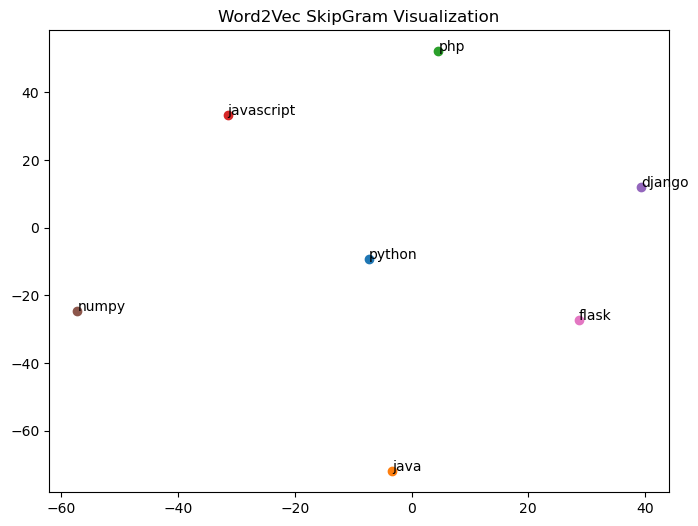

In [12]:
def plot_embeddings(model, words):
    word_vectors = np.array([model.wv[word] for word in words])  # Convert to NumPy array
    tsne = TSNE(n_components=2, perplexity=min(len(words) - 1, 5), random_state=42)  # Reduce perplexity
    word_vectors_2d = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(8, 6))
    for i, word in enumerate(words):
        plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
        plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
    plt.title("Word2Vec SkipGram Visualization")
    plt.show()
plot_embeddings(skipgram_model, selected_words)

In [13]:
df.to_csv("sample_train_tokens_with_stop_words.csv")

# WORD2VEC CBOW AND SKIPGRAM BINARY CLASSIFICATION USING NAIVE BAYES

In [1]:
import numpy as np
import pandas as pd
import gensim
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load pre-trained CBOW & Skip-gram models
cbow_model = gensim.models.Word2Vec.load(r"C:\Users\ASUS\Labs\NLP\Project\cbow_model.model")
skipgram_model = gensim.models.Word2Vec.load(r"C:\Users\ASUS\Labs\NLP\Project\skipgram_model.model")

# Load dataset
df = pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\sample_train_tokens_with_stop_words.csv")  # Adjust filename if needed

# Combine Title & BodyMarkdown
df["text"] = df["Title"].fillna("") + " " + df["BodyMarkdown"].fillna("")

# Convert OpenStatus (target variable) to binary labels
df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)

# Text Preprocessing (Tokenization)
def preprocess_text(text):
    return text.lower().split()  # Simple whitespace-based tokenization

df["tokens"] = df["text"].apply(preprocess_text)

# Function to compute document embeddings by averaging word vectors
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if len(vectors) > 0 else np.zeros(model.vector_size)

# Create features using CBOW embeddings
X_cbow = np.array([get_sentence_vector(tokens, cbow_model) for tokens in df["tokens"]])

# Create features using Skip-gram embeddings
X_skipgram = np.array([get_sentence_vector(tokens, skipgram_model) for tokens in df["tokens"]])

# Target labels
y = df["OpenStatus"].values

# Split dataset into train & test sets
X_cbow_train, X_cbow_test, y_train, y_test = train_test_split(X_cbow, y, test_size=0.2, random_state=42)
X_skipgram_train, X_skipgram_test, _, _ = train_test_split(X_skipgram, y, test_size=0.2, random_state=42)

# Train Naive Bayes Classifier on CBOW
nb_cbow = GaussianNB()
nb_cbow.fit(X_cbow_train, y_train)
y_pred_cbow = nb_cbow.predict(X_cbow_test)

# Train Naive Bayes Classifier on Skip-gram
nb_skipgram = GaussianNB()
nb_skipgram.fit(X_skipgram_train, y_train)
y_pred_skipgram = nb_skipgram.predict(X_skipgram_test)

# Evaluate Performance
print("Naive Bayes with CBOW Accuracy:", accuracy_score(y_test, y_pred_cbow))
print("Naive Bayes with Skip-gram Accuracy:", accuracy_score(y_test, y_pred_skipgram))

print("\nClassification Report (CBOW):")
print(classification_report(y_test, y_pred_cbow))

print("\nClassification Report (Skip-gram):")
print(classification_report(y_test, y_pred_skipgram))


Naive Bayes with CBOW Accuracy: 0.6808412047763323
Naive Bayes with Skip-gram Accuracy: 0.6806629834254143

Classification Report (CBOW):
              precision    recall  f1-score   support

           0       0.73      0.58      0.65     14117
           1       0.65      0.78      0.71     13938

    accuracy                           0.68     28055
   macro avg       0.69      0.68      0.68     28055
weighted avg       0.69      0.68      0.68     28055


Classification Report (Skip-gram):
              precision    recall  f1-score   support

           0       0.73      0.58      0.64     14117
           1       0.65      0.79      0.71     13938

    accuracy                           0.68     28055
   macro avg       0.69      0.68      0.68     28055
weighted avg       0.69      0.68      0.68     28055



# WORD2VEC CBOW AND SKIPGRAM BINARY CLASSIFICATION USING LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Splitting Data
X_train_cbow, X_test_cbow, y_train, y_test = train_test_split(X_cbow, y, test_size=0.2, random_state=42)
X_train_skipgram, X_test_skipgram, _, _ = train_test_split(X_skipgram, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg_cbow = LogisticRegression(max_iter=1000)
logreg_cbow.fit(X_train_cbow, y_train)
y_pred_cbow_logreg = logreg_cbow.predict(X_test_cbow)
print("Logistic Regression with CBOW Accuracy:", accuracy_score(y_test, y_pred_cbow_logreg))
print("\nClassification Report (CBOW - Logistic Regression):\n", classification_report(y_test, y_pred_cbow_logreg))

logreg_skipgram = LogisticRegression(max_iter=1000)
logreg_skipgram.fit(X_train_skipgram, y_train)
y_pred_skipgram_logreg = logreg_skipgram.predict(X_test_skipgram)
print("Logistic Regression with Skip-gram Accuracy:", accuracy_score(y_test, y_pred_skipgram_logreg))
print("\nClassification Report (Skip-gram - Logistic Regression):\n", classification_report(y_test, y_pred_skipgram_logreg))

Logistic Regression with CBOW Accuracy: 0.7159151666369631

Classification Report (CBOW - Logistic Regression):
               precision    recall  f1-score   support

           0       0.73      0.69      0.71     14117
           1       0.70      0.74      0.72     13938

    accuracy                           0.72     28055
   macro avg       0.72      0.72      0.72     28055
weighted avg       0.72      0.72      0.72     28055

Logistic Regression with Skip-gram Accuracy: 0.7217251826768847

Classification Report (Skip-gram - Logistic Regression):
               precision    recall  f1-score   support

           0       0.74      0.69      0.71     14117
           1       0.71      0.75      0.73     13938

    accuracy                           0.72     28055
   macro avg       0.72      0.72      0.72     28055
weighted avg       0.72      0.72      0.72     28055



#  WORD2VEC CBOW AND SKIPGRAM MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

In [44]:
import numpy as np
import pandas as pd
import gensim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load pre-trained CBOW & Skip-gram models
cbow_model = gensim.models.Word2Vec.load(r"C:\Users\ASUS\Labs\NLP\Project\cbow_model.model")
skipgram_model = gensim.models.Word2Vec.load(r"C:\Users\ASUS\Labs\NLP\Project\skipgram_model.model")

# Load dataset
df = pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\sample_train_tokens_with_stop_words.csv")

# Combine Title & BodyMarkdown
df["text"] = df["Title"].fillna("") + " " + df["BodyMarkdown"].fillna("")

# Keep OpenStatus as is for multiclass
y = df["OpenStatus"].values

# Preprocessing
def preprocess_text(text):
    return text.lower().split()

df["tokens"] = df["text"].apply(preprocess_text)

# Create sentence vectors
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X_cbow = np.array([get_sentence_vector(tokens, cbow_model) for tokens in df["tokens"]])
X_skipgram = np.array([get_sentence_vector(tokens, skipgram_model) for tokens in df["tokens"]])

# Train-Test Split
X_train_cbow, X_test_cbow, y_train, y_test = train_test_split(X_cbow, y, test_size=0.2, random_state=42)
X_train_skipgram, X_test_skipgram, _, _ = train_test_split(X_skipgram, y, test_size=0.2, random_state=42)

# ---------------- CBOW Logistic Regression ----------------
logreg_cbow = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg_cbow.fit(X_train_cbow, y_train)
y_pred_cbow = logreg_cbow.predict(X_test_cbow)

print("\n--- Logistic Regression (CBOW) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_cbow))
print("Classification Report:\n", classification_report(y_test, y_pred_cbow))

# ---------------- Skip-gram Logistic Regression ----------------
logreg_skipgram = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg_skipgram.fit(X_train_skipgram, y_train)
y_pred_skipgram = logreg_skipgram.predict(X_test_skipgram)

print("\n--- Logistic Regression (Skip-gram) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_skipgram))
print("Classification Report:\n", classification_report(y_test, y_pred_skipgram))



--- Logistic Regression (CBOW) ---
Accuracy: 0.6168240955266441
Classification Report:
                      precision    recall  f1-score   support

not a real question       0.55      0.34      0.42      6196
   not constructive       0.56      0.53      0.55      3110
          off topic       0.55      0.39      0.46      3563
               open       0.65      0.87      0.74     13938
      too localized       0.32      0.02      0.03      1248

           accuracy                           0.62     28055
          macro avg       0.53      0.43      0.44     28055
       weighted avg       0.59      0.62      0.58     28055


--- Logistic Regression (Skip-gram) ---
Accuracy: 0.6197825699518802
Classification Report:
                      precision    recall  f1-score   support

not a real question       0.54      0.34      0.42      6196
   not constructive       0.57      0.53      0.55      3110
          off topic       0.56      0.41      0.47      3563
               open 

In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\sample_train_tokens_with_stop_words.csv")

In [3]:
df

,Unnamed: 0,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus,text,tokens
0,0,6046168,05/18/2011 14:14:05,543315,09/17/2010 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,NaN,NaN,NaN,NaN,open,For Mongodb is it better to reference an objec...,"['for', 'mongodb', 'is', 'it', 'better', 'to',..."
1,1,4873911,02/02/2011 11:30:10,465076,10/03/2010 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,jaxp,NaN,NaN,NaN,open,How to insert schemalocation in a xml document...,"['how', 'to', 'insert', 'schemalocation', 'in'..."
2,2,3311559,07/22/2010 17:21:54,406143,07/22/2010 16:58:20,1,0,Too many lookup tables,What are the adverse effects of having too man...,sql-server,database-design,enums,NaN,NaN,NaN,open,Too many lookup tables What are the adverse e...,"['too', 'many', 'lookup', 'tables', 'what', 'a..."
3,3,9990413,04/03/2012 09:18:39,851755,07/19/2011 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,vb.net,NaN,NaN,NaN,04/15/2012 21:12:48,too localized,What is this PHP code in VB.net I am looking f...,"['what', 'is', 'this', 'php', 'code', 'in', 'v..."
4,4,10421966,05/02/2012 21:25:01,603588,02/04/2011 18:05:34,334,14,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,spring-data,NaN,NaN,NaN,NaN,open,Spring-Data mongodb querying multiple classes ...,"['spring', 'data', 'mongodb', 'querying', 'mul..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140267,140267,2982729,06/06/2010 01:03:41,8303,09/15/2008 15:40:08,520,34,Is it possible to implement bitwise operators ...,I am facing a rather peculiar problem. I am wo...,bitwise-operators,discrete-mathematics,compiler-optimization,NaN,NaN,NaN,open,Is it possible to implement bitwise operators ...,"['is', 'it', 'possible', 'to', 'implement', 'b..."
140268,140268,8809105,01/10/2012 19:13:53,1130251,01/04/2012 15:31:10,1,0,Ruby on Rails: MySql Gem does not work: uninit...,I have the following installed:\r\nMac Os 10.7...,mysql,ruby-on-rails,gem,osx-lion,NaN,NaN,open,Ruby on Rails: MySql Gem does not work: uninit...,"['ruby', 'on', 'rails', 'mysql', 'gem', 'does'..."
140269,140269,10674791,05/20/2012 15:36:31,1388595,05/11/2012 04:43:47,4,0,deleting image from image folder,I am working with an asp.net application.I wan...,asp.net,NaN,NaN,NaN,NaN,05/21/2012 21:21:27,not a real question,deleting image from image folder I am working ...,"['deleting', 'image', 'from', 'image', 'folder..."
140270,140270,3997045,10/22/2010 13:04:30,484232,10/22/2010 13:04:30,1,0,Need help making HTML's,Hi to all the gurus out there.\r\n\r\nAnybody ...,html,copy,remove,move,NaN,10/22/2010 13:10:28,not a real question,Need help making HTML's Hi to all the gurus ou...,"['need', 'help', 'making', 'html', 's', 'hi', ..."


In [4]:
df.OpenStatus.unique()

array(['open', 'too localized', 'not a real question', 'off topic',
       'not constructive'], dtype=object)

In [5]:
df.OpenStatus[(df.OpenStatus=='too localized') | (df.OpenStatus=='not a real question') | (df.OpenStatus=='off topic') | (df.OpenStatus=='not constructive')]='closed'

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4216\1536407353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.OpenStatus[(df.OpenStatus=='too localized') | (df.OpenStatus=='not a real question') | (df.OpenStatus=='off topic') | (df.OpenStatus=='not constructive')]='closed'


In [6]:
df1=pd.DataFrame(df.tokens)

In [7]:
df1["OpenStatus"]=df["OpenStatus"]

In [17]:
df1["text"]=df["text"]

In [18]:
df1

,tokens,OpenStatus,text
0,"['for', 'mongodb', 'is', 'it', 'better', 'to',...",open,For Mongodb is it better to reference an objec...
1,"['how', 'to', 'insert', 'schemalocation', 'in'...",open,How to insert schemalocation in a xml document...
2,"['too', 'many', 'lookup', 'tables', 'what', 'a...",open,Too many lookup tables What are the adverse e...
3,"['what', 'is', 'this', 'php', 'code', 'in', 'v...",too localized,What is this PHP code in VB.net I am looking f...
4,"['spring', 'data', 'mongodb', 'querying', 'mul...",open,Spring-Data mongodb querying multiple classes ...
...,...,...,...
140267,"['is', 'it', 'possible', 'to', 'implement', 'b...",open,Is it possible to implement bitwise operators ...
140268,"['ruby', 'on', 'rails', 'mysql', 'gem', 'does'...",open,Ruby on Rails: MySql Gem does not work: uninit...
140269,"['deleting', 'image', 'from', 'image', 'folder...",not a real question,deleting image from image folder I am working ...
140270,"['need', 'help', 'making', 'html', 's', 'hi', ...",not a real question,Need help making HTML's Hi to all the gurus ou...


# WORD2VEC and try checking outputs manually

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import gensim
import numpy as np
import ast

cbow_model = gensim.models.Word2Vec.load(r"C:\Users\ASUS\Labs\NLP\Project\cbow_model.model")
def token(tokens):
    tokens=ast.literal_eval(tokens)
    return tokens

df1["tokens"] = df1["tokens"].apply(token)

df1["OpenStatus"] = df1["OpenStatus"].map(lambda x: 1 if x == "open" else 0)

# Function to compute document embeddings by averaging word vectors
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if len(vectors) > 0 else np.zeros(model.vector_size)

X_cbow = np.array([get_sentence_vector(tokens, cbow_model) for tokens in df1["tokens"]])
y = df1["OpenStatus"].values

X_train_cbow, X_test_cbow, y_train, y_test = train_test_split(X_cbow, y, test_size=0.2, random_state=42)

logreg_cbow = LogisticRegression(max_iter=1000)
logreg_cbow.fit(X_train_cbow, y_train)
y_pred_cbow_logreg = logreg_cbow.predict(X_test_cbow)
print("Logistic Regression with CBOW Accuracy:", accuracy_score(y_test, y_pred_cbow_logreg))
print("\nClassification Report (CBOW - Logistic Regression):\n", classification_report(y_test, y_pred_cbow_logreg))

Logistic Regression with CBOW Accuracy: 0.7155230796649439

Classification Report (CBOW - Logistic Regression):
               precision    recall  f1-score   support

           0       0.73      0.69      0.71     14117
           1       0.70      0.74      0.72     13938

    accuracy                           0.72     28055
   macro avg       0.72      0.72      0.72     28055
weighted avg       0.72      0.72      0.72     28055



In [10]:
X_cbow

array([[ 1.19673407, -1.1496948 , -0.47109905, ...,  0.92122823,
         0.76633984,  0.27517998],
       [ 0.21567418, -0.17525965, -0.34893471, ...,  0.39837804,
         0.1116984 , -0.10287862],
       [ 1.41653335, -0.78492308, -0.19359712, ...,  1.31419539,
         0.95551556,  0.07127993],
       ...,
       [ 0.34200075, -0.59714407, -0.14165327, ...,  0.39085832,
         0.24077801,  0.25004232],
       [ 0.60892373, -0.68792725, -0.05876273, ...,  0.88152093,
         0.78955704,  0.3427099 ],
       [ 0.58660024, -0.58383334, -0.03596966, ...,  0.90438801,
         0.78233969,  0.09160873]])

In [10]:
sentence="There is a syntax error in my python code print('he'"

In [11]:
cbow_model = gensim.models.Word2Vec.load(r"C:\Users\ASUS\Labs\NLP\Project\cbow_model.model")
tokens = sentence.lower().split() 
sentence_vector = get_sentence_vector(tokens, cbow_model).reshape(1, -1)
pred=logreg_cbow.predict(sentence_vector)
if pred[0]==1:
    print("Open")
else:
    print("Closed")

Open


In [11]:
df2=df1[df1.OpenStatus==1]

In [12]:
test_open= np.array([get_sentence_vector(tokens, cbow_model) for tokens in df2["tokens"]])
pred=logreg_cbow.predict(test_open)
pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [13]:
df2["Pred"]=pred

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12340\2382551189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Pred"]=pred


In [14]:
df2

,tokens,OpenStatus,text,Pred
0,"[for, mongodb, is, it, better, to, reference, ...",1,For Mongodb is it better to reference an objec...,0
1,"[how, to, insert, schemalocation, in, a, xml, ...",1,How to insert schemalocation in a xml document...,1
2,"[too, many, lookup, tables, what, are, the, ad...",1,Too many lookup tables What are the adverse e...,0
4,"[spring, data, mongodb, querying, multiple, cl...",1,Spring-Data mongodb querying multiple classes ...,1
5,"[stop, ajax, function, in, midway, when, other...",1,stop ajax function in midway when other elemen...,1
...,...,...,...,...
140264,"[automated, typing, of, words, fed, through, t...",1,Automated typing of words fed through text/csv...,0
140265,"[how, to, check, unicode, string, to, be, lett...",1,"How to check unicode string to be letters, spa...",0
140267,"[is, it, possible, to, implement, bitwise, ope...",1,Is it possible to implement bitwise operators ...,1
140268,"[ruby, on, rails, mysql, gem, does, not, work,...",1,Ruby on Rails: MySql Gem does not work: uninit...,1


In [15]:
df_2=df2[df2["Pred"]==0]

In [16]:
df_2

,tokens,OpenStatus,text,Pred
0,"[for, mongodb, is, it, better, to, reference, ...",1,For Mongodb is it better to reference an objec...,0
2,"[too, many, lookup, tables, what, are, the, ad...",1,Too many lookup tables What are the adverse e...,0
10,"[in, gef, bendpoints, how, can, i, retrieve, p...",1,"In GEF bendpoints, how can i retrieve point fr...",0
20,"[how, can, a, windows, phone, 7, application, ...",1,How can a Windows Phone 7 application register...,0
25,"[micro, cloud, foundry, sinatra, hello, world,...",1,Micro Cloud Foundry Sinatra Hello world applic...,0
...,...,...,...,...
140250,"[summing, integers, recursive, with, java, i, ...",1,Summing integers recursive with Java. I have t...,0
140259,"[javascript, can, t, find, element, by, id, ht...",1,Javascript can't find element by id? <html...,0
140260,"[how, to, create, internet, explorer, sidebar,...",1,How to create Internet Explorer sidebar extens...,0
140264,"[automated, typing, of, words, fed, through, t...",1,Automated typing of words fed through text/csv...,0


In [17]:
df_2.to_csv("False Prediction of Open.csv")

In [18]:
df_2=df2[df2["Pred"]==1]

In [19]:
df_2.to_csv("True Prediction of Open.csv")

In [20]:
df_2

,tokens,OpenStatus,text,Pred
1,"[how, to, insert, schemalocation, in, a, xml, ...",1,How to insert schemalocation in a xml document...,1
4,"[spring, data, mongodb, querying, multiple, cl...",1,Spring-Data mongodb querying multiple classes ...,1
5,"[stop, ajax, function, in, midway, when, other...",1,stop ajax function in midway when other elemen...,1
6,"[regex, to, detect, javascript, in, a, string,...",1,Regex to detect Javascript In a string I am tr...,1
12,"[how, to, write, shellextension, contextmenuit...",1,How to write shellextension contextmenuitem in...,1
...,...,...,...,...
140253,"[hiding, inherited, members, in, c, i, m, look...",1,Hiding inherited members in C# I'm looking for...,1
140254,"[dropdown, dont, show, correct, parent, div, h...",1,dropdown dont show correct(parent div has over...,1
140267,"[is, it, possible, to, implement, bitwise, ope...",1,Is it possible to implement bitwise operators ...,1
140268,"[ruby, on, rails, mysql, gem, does, not, work,...",1,Ruby on Rails: MySql Gem does not work: uninit...,1


In [21]:
df3=df1[df1.OpenStatus==0]

In [22]:
test_close= np.array([get_sentence_vector(tokens, cbow_model) for tokens in df3["tokens"]])
pred=logreg_cbow.predict(test_close)
pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [23]:
df3["Pred"]=pred

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12340\3458487816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Pred"]=pred


In [24]:
df3

,tokens,OpenStatus,text,Pred
3,"[what, is, this, php, code, in, vb, net, i, am...",0,What is this PHP code in VB.net I am looking f...,0
7,"[list, of, all, txt, file, i, want, to, write,...",0,List of all .txt file I want to write a progra...,0
8,"[i, want, to, design, an, invitation, card, fo...",0,I want to design an invitation card for my wed...,0
9,"[vb, script, to, delete, header, and, footer, ...",0,VB Script To Delete Header and Footer plus App...,0
11,"[is, it, possible, to, create, csv, file, with...",0,Is It Possible to Create CSV File with Multipl...,1
...,...,...,...,...
140262,"[programming, a, microprocessor, im, not, sure...",0,Programming a microprocessor? Im not sure if t...,0
140263,"[disable, duplicate, tab, option, or, disable,...",0,Disable Duplicate Tab Option or disable the ta...,0
140266,"[force, compile, a, java, file, how, would, i,...",0,Force compile a .java file How would I get a ....,0
140269,"[deleting, image, from, image, folder, i, am, ...",0,deleting image from image folder I am working ...,1


In [25]:
df_3=df3[df3["Pred"]==1]

In [26]:
df_3.to_csv("False Prediction of Close.csv")

In [27]:
df_3=df3[df3["Pred"]==0]

In [28]:
df_3.to_csv("True Prediction of Close.csv")

In [22]:
sentence="Who is president of India? get me the python syntax error print('who is president of in"
cbow_model = gensim.models.Word2Vec.load(r"C:\Users\ASUS\Labs\NLP\Project\cbow_model.model")
tokens = sentence.lower().split() 
sentence_vector = get_sentence_vector(tokens, cbow_model).reshape(1, -1)
pred=logreg_cbow.predict(sentence_vector)
if pred[0]==1:
    print("Open")
else:
    print("Closed")

Closed


In [23]:
sentence="Get me the error in python  here is the c code printf('hel'"
cbow_model = gensim.models.Word2Vec.load(r"C:\Users\ASUS\Labs\NLP\Project\cbow_model.model")
tokens = sentence.lower().split() 
sentence_vector = get_sentence_vector(tokens, cbow_model).reshape(1, -1)
pred=logreg_cbow.predict(sentence_vector)
if pred[0]==1:
    print("Open")
else:
    print("Closed")

Closed


In [24]:
sentence="There is a syntax error in my java code system.out.println('he' "
cbow_model = gensim.models.Word2Vec.load(r"C:\Users\ASUS\Labs\NLP\Project\cbow_model.model")
tokens = sentence.lower().split() 
sentence_vector = get_sentence_vector(tokens, cbow_model).reshape(1, -1)
pred=logreg_cbow.predict(sentence_vector)
if pred[0]==1:
    print("Open")
else:
    print("Closed")

Closed


In [25]:
sentence="There is a syntax error in my python code print('he' "
cbow_model = gensim.models.Word2Vec.load(r"C:\Users\ASUS\Labs\NLP\Project\cbow_model.model")
tokens = sentence.lower().split() 
sentence_vector = get_sentence_vector(tokens, cbow_model).reshape(1, -1)
pred=logreg_cbow.predict(sentence_vector)
if pred[0]==1:
    print("Open")
else:
    print("Closed")

Open


In [ ]:
sentence="There is a syntax error in python code print('he' "
cbow_model = gensim.models.Word2Vec.load(r"C:\Users\ASUS\Labs\NLP\Project\cbow_model.model")
tokens = sentence.lower().split() 
sentence_vector = get_sentence_vector(tokens, cbow_model).reshape(1, -1)
pred=logreg_cbow.predict(sentence_vector)
if pred[0]==1:
    print("Open")
else:
    print("Closed")

In [67]:
import joblib

# Save the model
joblib.dump(logreg_cbow, "logreg_cbow_model.pkl")

# Load the model
logreg_cbow_loaded = joblib.load("logreg_cbow_model.pkl")


# SBERT TITLE+BODYMARKDOWN

In [29]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load a pre-trained BERT model for sentence embeddings
bert_model = SentenceTransformer("all-MiniLM-L6-v2")  # Efficient & good performance

# Assume df1 contains our dataset with "text" (combined title + body) and "OpenStatus"
df1["OpenStatus"] = df1["OpenStatus"].map(lambda x: 1 if x == "open" else 0)

# Generate embeddings
X_bert = np.array(bert_model.encode(df1["text"].tolist(), convert_to_numpy=True))
y = df1["OpenStatus"].values

# Split into train & test sets
X_train_bert, X_test_bert, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)

# Train Logistic Regression on BERT embeddings
logreg_bert = LogisticRegression(max_iter=1000)
logreg_bert.fit(X_train_bert, y_train)

# Predict and evaluate
y_pred_bert = logreg_bert.predict(X_test_bert)

print("Logistic Regression with BERT Accuracy:", accuracy_score(y_test, y_pred_bert))
print("\nClassification Report (BERT - Logistic Regression):\n", classification_report(y_test, y_pred_bert))


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Logistic Regression with BERT Accuracy: 0.7552307966494386

Classification Report (BERT - Logistic Regression):
               precision    recall  f1-score   support

           0       0.76      0.75      0.75     14117
           1       0.75      0.77      0.76     13938

    accuracy                           0.76     28055
   macro avg       0.76      0.76      0.76     28055
weighted avg       0.76      0.76      0.76     28055



In [30]:
X_bert

array([[-0.00409021,  0.03848155, -0.08007107, ..., -0.02321486,
        -0.037428  ,  0.02332036],
       [ 0.06856707, -0.02134919, -0.00139485, ...,  0.05545509,
         0.01753581,  0.01420245],
       [ 0.01169384, -0.02159495, -0.05384359, ..., -0.04422171,
        -0.07098272,  0.07243653],
       ...,
       [ 0.03182372,  0.00249363, -0.09880762, ...,  0.03707518,
        -0.02233639, -0.05024064],
       [-0.03258473, -0.01201572, -0.14578347, ...,  0.02647092,
         0.00956726,  0.08082717],
       [-0.02405371,  0.08321401, -0.01471415, ..., -0.01313205,
         0.08241286, -0.01497937]], dtype=float32)

In [31]:
df1=pd.DataFrame(df.text)

In [32]:
df1["OpenStatus"]=df["OpenStatus"]

In [33]:
df1

,text,OpenStatus
0,For Mongodb is it better to reference an objec...,1
1,How to insert schemalocation in a xml document...,1
2,Too many lookup tables What are the adverse e...,1
3,What is this PHP code in VB.net I am looking f...,0
4,Spring-Data mongodb querying multiple classes ...,1
...,...,...
140267,Is it possible to implement bitwise operators ...,1
140268,Ruby on Rails: MySql Gem does not work: uninit...,1
140269,deleting image from image folder I am working ...,0
140270,Need help making HTML's Hi to all the gurus ou...,0


In [34]:
df2=df1[df1.OpenStatus==1]

In [35]:
df2

,text,OpenStatus
0,For Mongodb is it better to reference an objec...,1
1,How to insert schemalocation in a xml document...,1
2,Too many lookup tables What are the adverse e...,1
4,Spring-Data mongodb querying multiple classes ...,1
5,stop ajax function in midway when other elemen...,1
...,...,...
140264,Automated typing of words fed through text/csv...,1
140265,"How to check unicode string to be letters, spa...",1
140267,Is it possible to implement bitwise operators ...,1
140268,Ruby on Rails: MySql Gem does not work: uninit...,1


In [36]:
X_bert_open = np.array(bert_model.encode(df2["text"].tolist(), convert_to_numpy=True))
pred=logreg_bert.predict(X_bert_open)

In [37]:
df2["Pred"]=pred

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12340\2382551189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Pred"]=pred


In [38]:
df_2=df2[df2.Pred==0]

In [39]:
df_2

,text,OpenStatus,Pred
2,Too many lookup tables What are the adverse e...,1,0
25,Micro Cloud Foundry Sinatra Hello world applic...,1,0
26,What views can i use in an appWidget? Can anyo...,1,0
32,Make input in program input value at website I...,1,0
34,can you create one div to flow over others lik...,1,0
...,...,...,...
140241,which one to use windows services or threading...,1,0
140246,How to find the closest value of 2^N to a give...,1,0
140250,Summing integers recursive with Java. I have t...,1,0
140259,Javascript can't find element by id? <html...,1,0


In [40]:
df_2.to_csv("False Prediction of Open_Bert.csv")

In [41]:
df_2=df2[df2.Pred==1]

In [42]:
df_2.to_csv("True Prediction of Open_Bert.csv")

In [43]:
df3=df1[df1.OpenStatus==0]

In [44]:
df3

,text,OpenStatus
3,What is this PHP code in VB.net I am looking f...,0
7,List of all .txt file I want to write a progra...,0
8,I want to design an invitation card for my wed...,0
9,VB Script To Delete Header and Footer plus App...,0
11,Is It Possible to Create CSV File with Multipl...,0
...,...,...
140262,Programming a microprocessor? Im not sure if t...,0
140263,Disable Duplicate Tab Option or disable the ta...,0
140266,Force compile a .java file How would I get a ....,0
140269,deleting image from image folder I am working ...,0


In [45]:
X_bert_close = np.array(bert_model.encode(df3["text"].tolist(), convert_to_numpy=True))
pred=logreg_bert.predict(X_bert_close)

In [46]:
df3["Pred"]=pred

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12340\3458487816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Pred"]=pred


In [47]:
df_3=df3[df3.Pred==1]

In [48]:
df3

,text,OpenStatus,Pred
3,What is this PHP code in VB.net I am looking f...,0,0
7,List of all .txt file I want to write a progra...,0,0
8,I want to design an invitation card for my wed...,0,0
9,VB Script To Delete Header and Footer plus App...,0,0
11,Is It Possible to Create CSV File with Multipl...,0,1
...,...,...,...
140262,Programming a microprocessor? Im not sure if t...,0,0
140263,Disable Duplicate Tab Option or disable the ta...,0,1
140266,Force compile a .java file How would I get a ....,0,1
140269,deleting image from image folder I am working ...,0,1


In [49]:
df_3.to_csv("False Prediction of Close_Bert.csv")

In [50]:
df_3=df3[df3.Pred==0]

In [51]:
df_3.to_csv("True Prediction of Close_Bert.csv")

In [20]:
df1.OpenStatus.unique()

array([0, 1, 2, 3, 4], dtype=int64)

# SBERT TITLE+BODYMARKDOWN (with 4 classes)

In [22]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load a pre-trained BERT model for sentence embeddings
bert_model = SentenceTransformer("all-MiniLM-L6-v2")  

# Convert OpenStatus to numerical labels for multiclass classification
unique_labels = df["OpenStatus"].unique()
label_to_index = {label: i for i, label in enumerate(unique_labels)}
df["OpenStatus"] = df["OpenStatus"].map(label_to_index)

# Generate BERT embeddings
X_bert = np.array(bert_model.encode(df["text"].tolist(), convert_to_numpy=True))
y = df["OpenStatus"].values

# Train-test split
X_train_bert, X_test_bert, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)

# Multiclass Logistic Regression
logreg_bert = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="multinomial")  
logreg_bert.fit(X_train_bert, y_train)

# Predictions
y_pred_bert = logreg_bert.predict(X_test_bert)

# Convert numerical predictions back to labels
index_to_label = {i: label for label, i in label_to_index.items()}
y_test_labels = [index_to_label[y] for y in y_test]
y_pred_labels = [index_to_label[y] for y in y_pred_bert]

# Evaluation
print("Multiclass Logistic Regression with BERT Accuracy:", accuracy_score(y_test, y_pred_bert))
print("\nClassification Report (BERT - Multiclass Logistic Regression):\n", classification_report(y_test_labels, y_pred_labels))


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Multiclass Logistic Regression with BERT Accuracy: 0.6507574407414008

Classification Report (BERT - Multiclass Logistic Regression):
                      precision    recall  f1-score   support

not a real question       0.56      0.47      0.51      6196
   not constructive       0.60      0.60      0.60      3110
          off topic       0.58      0.43      0.49      3563
               open       0.70      0.86      0.77     13938
      too localized       0.44      0.03      0.06      1248

           accuracy                           0.65     28055
          macro avg       0.58      0.48      0.49     28055
       weighted avg       0.63      0.65      0.63     28055



In [20]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\False Prediction of Open.csv")

In [35]:
df


,Unnamed: 0,tokens,OpenStatus,text,Pred
0,0,"['for', 'mongodb', 'is', 'it', 'better', 'to',...",1,For Mongodb is it better to reference an objec...,0
1,2,"['too', 'many', 'lookup', 'tables', 'what', 'a...",1,Too many lookup tables What are the adverse e...,0
2,10,"['in', 'gef', 'bendpoints', 'how', 'can', 'i',...",1,"In GEF bendpoints, how can i retrieve point fr...",0
3,20,"['how', 'can', 'a', 'windows', 'phone', '7', '...",1,How can a Windows Phone 7 application register...,0
4,25,"['micro', 'cloud', 'foundry', 'sinatra', 'hell...",1,Micro Cloud Foundry Sinatra Hello world applic...,0
...,...,...,...,...,...
17991,140250,"['summing', 'integers', 'recursive', 'with', '...",1,Summing integers recursive with Java. I have t...,0
17992,140259,"['javascript', 'can', 't', 'find', 'element', ...",1,Javascript can't find element by id? <html...,0
17993,140260,"['how', 'to', 'create', 'internet', 'explorer'...",1,How to create Internet Explorer sidebar extens...,0
17994,140264,"['automated', 'typing', 'of', 'words', 'fed', ...",1,Automated typing of words fed through text/csv...,0


In [21]:
import numpy as np
avg=np.array([len(text) for text in df.text])

In [45]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Compute text lengths
avg = np.array([len(text) for text in df.text]).reshape(-1, 1)  # Reshape for sklearn

# Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
avg_scaled = scaler.fit_transform(avg)

print(avg_scaled.flatten())  # Values now between 0 and 1


[0.017469   0.00510068 0.00480064 ... 0.02977064 0.01163488 0.01220163]


In [46]:
np.mean(avg_scaled)

0.021960390821613884

In [25]:
import pandas as pd
df1=pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\True Prediction of Open.csv")

In [36]:
df1

,Unnamed: 0,tokens,OpenStatus,text,Pred
0,1,"['how', 'to', 'insert', 'schemalocation', 'in'...",1,How to insert schemalocation in a xml document...,1
1,4,"['spring', 'data', 'mongodb', 'querying', 'mul...",1,Spring-Data mongodb querying multiple classes ...,1
2,5,"['stop', 'ajax', 'function', 'in', 'midway', '...",1,stop ajax function in midway when other elemen...,1
3,6,"['regex', 'to', 'detect', 'javascript', 'in', ...",1,Regex to detect Javascript In a string I am tr...,1
4,12,"['how', 'to', 'write', 'shellextension', 'cont...",1,How to write shellextension contextmenuitem in...,1
...,...,...,...,...,...
52135,140253,"['hiding', 'inherited', 'members', 'in', 'c', ...",1,Hiding inherited members in C# I'm looking for...,1
52136,140254,"['dropdown', 'dont', 'show', 'correct', 'paren...",1,dropdown dont show correct(parent div has over...,1
52137,140267,"['is', 'it', 'possible', 'to', 'implement', 'b...",1,Is it possible to implement bitwise operators ...,1
52138,140268,"['ruby', 'on', 'rails', 'mysql', 'gem', 'does'...",1,Ruby on Rails: MySql Gem does not work: uninit...,1


In [26]:
import numpy as np
avg=np.array([len(text) for text in df1.text])

In [49]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Compute text lengths
avg = np.array([len(text) for text in df1.text]).reshape(-1, 1)  # Reshape for sklearn

# Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
avg_scaled = scaler.fit_transform(avg)

print(avg_scaled.flatten())  # Values now between 0 and 1


[0.03181848 0.02095689 0.01762511 ... 0.1058506  0.02752049 0.02522156]


In [50]:
np.mean(avg_scaled)

0.03521380471238471

In [51]:
c=0
for i in df.text:
    if ('code' in i) | ('{' in i) :
        c+=1
c/len(df)

0.31456990442320515

In [52]:
c=0
for i in df1.text:
    if ('code' in i) | ('{' in i) :
        c+=1
c/len(df1)

0.49493670886075947

In [4]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\sample_train_tokens_with_stop_words.csv")

In [5]:
df.OpenStatus[(df.OpenStatus=='too localized') | (df.OpenStatus=='not a real question') | (df.OpenStatus=='off topic') | (df.OpenStatus=='not constructive')]='closed'

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15652\1536407353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.OpenStatus[(df.OpenStatus=='too localized') | (df.OpenStatus=='not a real question') | (df.OpenStatus=='off topic') | (df.OpenStatus=='not constructive')]='closed'


In [6]:
df1=pd.DataFrame(df.Title)

In [7]:
df1["OpenStatus"]=df["OpenStatus"]

In [8]:
df1

,Title,OpenStatus
0,For Mongodb is it better to reference an objec...,open
1,How to insert schemalocation in a xml document...,open
2,Too many lookup tables,open
3,What is this PHP code in VB.net,closed
4,Spring-Data mongodb querying multiple classes ...,open
...,...,...
140267,Is it possible to implement bitwise operators ...,open
140268,Ruby on Rails: MySql Gem does not work: uninit...,open
140269,deleting image from image folder,closed
140270,Need help making HTML's,closed


# SBERT TITLE ONLY

In [9]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load a pre-trained BERT model for sentence embeddings
bert_model = SentenceTransformer("all-MiniLM-L6-v2")  # Efficient & good performance

# Assume df1 contains our dataset with "text" (combined title + body) and "OpenStatus"
df1["OpenStatus"] = df1["OpenStatus"].map(lambda x: 1 if x == "open" else 0)

# Generate embeddings
X_bert = np.array(bert_model.encode(df1["Title"].tolist(), convert_to_numpy=True))
y = df1["OpenStatus"].values

# Split into train & test sets
X_train_bert, X_test_bert, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)

# Train Logistic Regression on BERT embeddings
logreg_bert = LogisticRegression(max_iter=1000)
logreg_bert.fit(X_train_bert, y_train)

# Predict and evaluate
y_pred_bert = logreg_bert.predict(X_test_bert)

print("Logistic Regression with BERT Accuracy:", accuracy_score(y_test, y_pred_bert))
print("\nClassification Report (BERT - Logistic Regression):\n", classification_report(y_test, y_pred_bert))


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Logistic Regression with BERT Accuracy: 0.7134200677241134

Classification Report (BERT - Logistic Regression):
               precision    recall  f1-score   support

           0       0.72      0.69      0.71     14117
           1       0.70      0.73      0.72     13938

    accuracy                           0.71     28055
   macro avg       0.71      0.71      0.71     28055
weighted avg       0.71      0.71      0.71     28055



In [10]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\sample_train_tokens_with_stop_words.csv")

In [11]:
df.OpenStatus[(df.OpenStatus=='too localized') | (df.OpenStatus=='not a real question') | (df.OpenStatus=='off topic') | (df.OpenStatus=='not constructive')]='closed'

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15652\1536407353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.OpenStatus[(df.OpenStatus=='too localized') | (df.OpenStatus=='not a real question') | (df.OpenStatus=='off topic') | (df.OpenStatus=='not constructive')]='closed'


In [12]:
df1=pd.DataFrame(df.BodyMarkdown)

In [13]:
df1["OpenStatus"]=df["OpenStatus"]

In [14]:
df1

,BodyMarkdown,OpenStatus
0,I am building a corpus of indexed sentences in...,open
1,i create a xml document with JAXP and search a...,open
2,What are the adverse effects of having too man...,open
3,I am looking for the vb.net equivalent of this...,closed
4,"With Spring-Data, you can use the @Document an...",open
...,...,...
140267,I am facing a rather peculiar problem. I am wo...,open
140268,I have the following installed:\r\nMac Os 10.7...,open
140269,I am working with an asp.net application.I wan...,closed
140270,Hi to all the gurus out there.\r\n\r\nAnybody ...,closed


# SBERT BODYMARKDOWN ONLY

In [15]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load a pre-trained BERT model for sentence embeddings
bert_model = SentenceTransformer("all-MiniLM-L6-v2")  # Efficient & good performance

# Assume df1 contains our dataset with "text" (combined title + body) and "OpenStatus"
df1["OpenStatus"] = df1["OpenStatus"].map(lambda x: 1 if x == "open" else 0)

# Generate embeddings
X_bert = np.array(bert_model.encode(df1["BodyMarkdown"].tolist(), convert_to_numpy=True))
y = df1["OpenStatus"].values

# Split into train & test sets
X_train_bert, X_test_bert, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)

# Train Logistic Regression on BERT embeddings
logreg_bert = LogisticRegression(max_iter=1000)
logreg_bert.fit(X_train_bert, y_train)

# Predict and evaluate
y_pred_bert = logreg_bert.predict(X_test_bert)

print("Logistic Regression with BERT Accuracy:", accuracy_score(y_test, y_pred_bert))
print("\nClassification Report (BERT - Logistic Regression):\n", classification_report(y_test, y_pred_bert))


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Logistic Regression with BERT Accuracy: 0.7493494920691499

Classification Report (BERT - Logistic Regression):
               precision    recall  f1-score   support

           0       0.76      0.73      0.75     14117
           1       0.74      0.76      0.75     13938

    accuracy                           0.75     28055
   macro avg       0.75      0.75      0.75     28055
weighted avg       0.75      0.75      0.75     28055



# EXTRACT CODE SNIPPETS

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ASUS\Labs\NLP\Project\train-sample.csv\train-sample.csv")

In [69]:
import pandas as pd
import re


def extract_code_snippets(text):
    if pd.isna(text):
        return ""

    # Extract properly formatted code blocks (triple backticks)
    triple_backtick_pattern = re.findall(r'```(?:[a-zA-Z]+\n)?(.*?)```', text, re.DOTALL)
    
    # Extract code from <code>...</code> tags
    html_code_pattern = re.findall(r'<code>(.*?)</code>', text, re.DOTALL)
    
    # Extract indented code (at least 4 spaces at the start of the line)
    indented_code_pattern = re.findall(r'(?m)(?:^|\n)(    .+)', text)
    
    # Extract inline code (single backticks)
    inline_code_pattern = re.findall(r'`(.*?)`', text)
    
    # Extract code-like patterns that use common programming keywords or symbols
    code_like_pattern = re.findall(r'(?m)(?:^|\n).*?[=;{}<>()[\]]+.*', text)
    
    # Combine all extracted snippets
    extracted_code = (
        triple_backtick_pattern + html_code_pattern + indented_code_pattern + 
        inline_code_pattern + code_like_pattern
    )
    
    # Join multiple snippets with a gap between them
    return "\n\n".join(extracted_code)




# Apply function to extract code snippets
df["CodeSnippets"] = df["BodyMarkdown"].apply(extract_code_snippets)

# Save the modified dataset
df.to_csv("train-sample_with_code.csv", index=False)

print("Code snippets extracted and saved successfully!")

Code snippets extracted and saved successfully!


In [14]:
import pandas as pd
df=pd.read_csv(r"train-sample_with_code.csv")

In [9]:
df.isnull().sum()

PostId                                      0
PostCreationDate                            0
OwnerUserId                                 0
OwnerCreationDate                           0
ReputationAtPostCreation                    0
OwnerUndeletedAnswerCountAtPostTime         0
Title                                       0
BodyMarkdown                                0
Tag1                                       10
Tag2                                    27251
Tag3                                    64358
Tag4                                   100622
Tag5                                   124558
PostClosedDate                          70136
OpenStatus                                  0
CodeSnippets                            44278
CodeLanguage                                0
dtype: int64

# SBERT CONCATINATE { TITLE + BODYMARKDOWN(WITH CODE) + TAGS + CODE}

In [2]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import torch

# Load SBERT model and move it to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Function to encode text using GPU
def encode_text(text):
    if isinstance(text, str) and text.strip():  
        return sbert_model.encode(text, convert_to_tensor=True, device=device).cpu().numpy().tolist()
    else:
        return np.zeros(384).tolist()  # Return zero vector for empty values

# Fill NaN values
df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
df['Tags_combined'] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].apply(lambda x: ' '.join(x), axis=1)

# Compute embeddings using GPU
df['Title_embedding'] = df['Title'].apply(encode_text)
df['BodyMarkdown_embedding'] = df['BodyMarkdown'].apply(encode_text)
df['CodeSnippets_embedding'] = df['CodeSnippets'].apply(encode_text)
df['Tags_embedding'] = df['Tags_combined'].apply(encode_text)

# Merge embeddings
def merge_embeddings(row):
    return np.concatenate([
        row['Title_embedding'],
        row['BodyMarkdown_embedding'],
        row['CodeSnippets_embedding'],
        row['Tags_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


cuda


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
df.to_csv("with_code_embeddings.csv",index=False)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7698
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77     14117
           1       0.77      0.77      0.77     13938

    accuracy                           0.77     28055
   macro avg       0.77      0.77      0.77     28055
weighted avg       0.77      0.77      0.77     28055



# SBERT CONCATINATE { TITLE + BODYMARKDOWN(WITHOUT CODE) + TAGS + CODE}

In [1]:
import pandas as pd
df=pd.read_csv(r"with_code_embeddings.csv")

In [16]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import torch

# Load SBERT model and move it to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Function to encode text using GPU
def encode_text(text):
    if isinstance(text, str) and text.strip():  
        return sbert_model.encode(text, convert_to_tensor=True, device=device).cpu().numpy().tolist()
    else:
        return np.zeros(384).tolist()  # Return zero vector for empty values

# Fill NaN values
df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
df['Tags_combined'] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].apply(lambda x: ' '.join(x), axis=1)

def remove_code_from_body(body, code):
    body = str(body) if pd.notna(body) else ""  # Ensure body is a string
    code = str(code) if pd.notna(code) else ""  # Ensure code is a string
    return body.replace(code, "").strip() if code in body else body
df['BodyMarkdown'] = df.apply(lambda row: remove_code_from_body(row['BodyMarkdown'], row['CodeSnippets']), axis=1)


df['Title_embedding'] = df['Title'].apply(encode_text)
df['BodyMarkdown_embedding'] = df['BodyMarkdown'].apply(encode_text)
df['CodeSnippets_embedding'] = df['CodeSnippets'].apply(encode_text)
df['Tags_embedding'] = df['Tags_combined'].apply(encode_text)

# Merge embeddings
def merge_embeddings(row):
    return np.concatenate([
        row['Title_embedding'],
        row['BodyMarkdown_embedding'],
        row['CodeSnippets_embedding'],
        row['Tags_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)


cuda


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7641
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76     14117
           1       0.76      0.77      0.76     13938

    accuracy                           0.76     28055
   macro avg       0.76      0.76      0.76     28055
weighted avg       0.76      0.76      0.76     28055



# SBERT CONCATINATE { TITLE + BODYMARKDOWN(WITHOUT CODE) + CODE}

In [18]:
def merge_embeddings(row):
    return np.concatenate([
        row['Title_embedding'],
        row['BodyMarkdown_embedding'],
        row['CodeSnippets_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

#df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7593
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76     14117
           1       0.76      0.76      0.76     13938

    accuracy                           0.76     28055
   macro avg       0.76      0.76      0.76     28055
weighted avg       0.76      0.76      0.76     28055



# SBERT CONCATINATE { TITLE + BODYMARKDOWN(WITH CODE) + CODE}

In [1]:
import pandas as pd
df=pd.read_csv(r"train-sample_with_code.csv")

In [21]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import torch

# Load SBERT model and move it to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)



def encode_text(text):
    if isinstance(text, str) and text.strip():  
        return sbert_model.encode(text, convert_to_tensor=True, device=device).cpu().numpy().tolist()
    else:
        return np.zeros(384).tolist()  # Return zero vector for empty values
df['Title_embedding'] = df['Title'].apply(encode_text)
df['BodyMarkdown_embedding'] = df['BodyMarkdown'].apply(encode_text)
df['CodeSnippets_embedding'] = df['CodeSnippets'].apply(encode_text)  
def merge_embeddings(row):
    return np.concatenate([
        row['Title_embedding'],
        row['BodyMarkdown_embedding'],
        row['CodeSnippets_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)

cuda


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7645
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76     14117
           1       0.76      0.77      0.76     13938

    accuracy                           0.76     28055
   macro avg       0.76      0.76      0.76     28055
weighted avg       0.76      0.76      0.76     28055



# SBERT CONCATINATE { TITLE + BODYMARKDOWN(WITH CODE)}

In [23]:
def merge_embeddings(row):
    return np.concatenate([
        row['Title_embedding'],
        row['BodyMarkdown_embedding'],
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

#df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7614
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76     14117
           1       0.75      0.77      0.76     13938

    accuracy                           0.76     28055
   macro avg       0.76      0.76      0.76     28055
weighted avg       0.76      0.76      0.76     28055



In [18]:
import pandas as pd
df=pd.read_csv(r"train-sample_with_code.csv")

In [19]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import torch

# Load SBERT model and move it to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Function to encode text using GPU
def encode_text(text):
    if isinstance(text, str) and text.strip():  
        return sbert_model.encode(text, convert_to_tensor=True, device=device).cpu().numpy().tolist()
    else:
        return np.zeros(384).tolist()  # Return zero vector for empty values

# Fill NaN values
df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
df['Tags_combined'] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].apply(lambda x: ' '.join(x), axis=1)

# Compute embeddings using GPU
print("started")
df['Title_embedding'] = df['Title'].apply(encode_text)
print("Title finished")
df['BodyMarkdown_embedding'] = df['BodyMarkdown'].apply(encode_text)
print("Bodymarkdown finished")
df['CodeSnippets_embedding'] = df['CodeSnippets'].apply(encode_text)
print("Codesnippets Finished")
df['Tags_embedding'] = df['Tags_combined'].apply(encode_text)
print("tags finished")

# Merge embeddings
def merge_embeddings(row):
    return np.concatenate([
        row['Title_embedding'],
        row['BodyMarkdown_embedding'],
        row['CodeSnippets_embedding'],
        row['Tags_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)

cuda
started
Title finished
Bodymarkdown finished
Codesnippets Finished
tags finished


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7258
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72     14117
           1       0.71      0.75      0.73     13938

    accuracy                           0.73     28055
   macro avg       0.73      0.73      0.73     28055
weighted avg       0.73      0.73      0.73     28055



In [10]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:25:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7555
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75     14117
           1       0.75      0.76      0.76     13938

    accuracy                           0.76     28055
   macro avg       0.76      0.76      0.76     28055
weighted avg       0.76      0.76      0.76     28055



# SBERT CONCATINATE { TITLE + BODYMARKDOWN(WITH CODE) + TAGS + CODE} => (USING SVM LINEAR KERNEL)

In [6]:
from sklearn.svm import SVC

# Train SVM model
svm_clf = SVC(kernel='linear', C=1.0)

In [7]:
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
y_pred_svm = svm_clf.predict(X_test)

In [9]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7706
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77     14117
           1       0.77      0.77      0.77     13938

    accuracy                           0.77     28055
   macro avg       0.77      0.77      0.77     28055
weighted avg       0.77      0.77      0.77     28055



# SBERT CONCATINATE { TITLE + BODYMARKDOWN(WITH CODE) + TAGS + CODE} => (MUTLICLASS CLASSIFICATION) using different MODELS

In [22]:
df_m=df.copy()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

label_encoder = LabelEncoder()
df_m["OpenStatus"] = label_encoder.fit_transform(df_m["OpenStatus"])  

X = np.vstack(df_m['combined_embedding'].values)  
y = df_m["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model for multi-class classification
clf = LogisticRegression(max_iter=1000, multi_class="multinomial", solver="lbfgs")
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Logistic Regression Accuracy: 0.6649
Classification Report:
                      precision    recall  f1-score   support

not a real question       0.57      0.51      0.54      6196
   not constructive       0.60      0.59      0.60      3110
          off topic       0.60      0.49      0.54      3563
               open       0.72      0.85      0.78     13938
      too localized       0.42      0.06      0.11      1248

           accuracy                           0.66     28055
          macro avg       0.58      0.50      0.51     28055
       weighted avg       0.65      0.66      0.65     28055



In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Random Forest Accuracy: 0.5837
Classification Report:
                      precision    recall  f1-score   support

not a real question       0.52      0.32      0.40      6196
   not constructive       0.61      0.39      0.48      3110
          off topic       0.64      0.10      0.17      3563
               open       0.59      0.92      0.72     13938
      too localized       0.00      0.00      0.00      1248

           accuracy                           0.58     28055
          macro avg       0.47      0.35      0.35     28055
       weighted avg       0.56      0.58      0.52     28055



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
df_m=df.copy()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert OpenStatus to numerical labels for multi-class classification
label_encoder = LabelEncoder()
df_m["OpenStatus"] = label_encoder.fit_transform(df_m["OpenStatus"])  # Encode categories as 0,1,2,...

X = np.vstack(df_m['combined_embedding'].values)  
y = df_m["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model for multi-class classification
clf = SVC(kernel="linear", decision_function_shape="ovr")  # "ovr" = One-vs-Rest strategy
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


SVM Accuracy: 0.6670
Classification Report:
                      precision    recall  f1-score   support

not a real question       0.57      0.51      0.54      6196
   not constructive       0.60      0.62      0.61      3110
          off topic       0.62      0.49      0.55      3563
               open       0.72      0.85      0.78     13938
      too localized       0.00      0.00      0.00      1248

           accuracy                           0.67     28055
          macro avg       0.50      0.49      0.50     28055
       weighted avg       0.63      0.67      0.64     28055



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# SBERT CONCATINATE { TITLE + BODYMARKDOWN(WITH CODE) + TAGS + CODE} => (MUTLICLASS CLASSIFICATION AND OUTPUT AS BINARY CLASSIFICATION)

In [1]:
import pandas as pd
df=pd.read_csv(r"train-sample_with_code.csv")

In [2]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import torch

# Load SBERT model and move it to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Function to encode text using GPU
def encode_text(text):
    if isinstance(text, str) and text.strip():  
        return sbert_model.encode(text, convert_to_tensor=True, device=device).cpu().numpy().tolist()
    else:
        return np.zeros(384).tolist()  # Return zero vector for empty values

# Fill NaN values
df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
df['Tags_combined'] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].apply(lambda x: ' '.join(x), axis=1)

# Compute embeddings using GPU
print("started")
df['Title_embedding'] = df['Title'].apply(encode_text)
print("Title finished")
df['BodyMarkdown_embedding'] = df['BodyMarkdown'].apply(encode_text)
print("Bodymarkdown finished")
df['CodeSnippets_embedding'] = df['CodeSnippets'].apply(encode_text)
print("Codesnippets Finished")
df['Tags_embedding'] = df['Tags_combined'].apply(encode_text)
print("tags finished")

# Merge embeddings
def merge_embeddings(row):
    return np.concatenate([
        row['Title_embedding'],
        row['BodyMarkdown_embedding'],
        row['CodeSnippets_embedding'],
        row['Tags_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)


cuda
started
Title finished
Bodymarkdown finished
Codesnippets Finished
tags finished


In [3]:
df_m=df.copy()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert OpenStatus to numerical labels for multi-class classification
label_encoder = LabelEncoder()
df_m["OpenStatus"] = label_encoder.fit_transform(df_m["OpenStatus"])  # Encode categories as 0,1,2,...

X = np.vstack(df_m['combined_embedding'].values)  
y = df_m["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model for multi-class classification
clf = SVC(kernel="linear", decision_function_shape="ovr")  # "ovr" = One-vs-Rest strategy
clf.fit(X_train, y_train)

# Predictions for multi-class classification
y_pred = clf.predict(X_test)

# ---- Convert to Binary Classification (Open vs. Rest) ----
# Identify the label index for "open"
open_class_index = np.where(label_encoder.classes_ == "open")[0][0]

# Convert y_test and y_pred into binary classification
y_test_binary = np.where(y_test == open_class_index, 1, 0)
y_pred_binary = np.where(y_pred == open_class_index, 1, 0)

# Evaluate binary classification
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f"SVM Binary (Open vs. Rest) Accuracy: {accuracy_binary:.4f}")
print("Binary Classification Report:\n", classification_report(y_test_binary, y_pred_binary, target_names=["Not Open", "Open"]))


SVM Binary (Open vs. Rest) Accuracy: 0.7642
Binary Classification Report:
               precision    recall  f1-score   support

    Not Open       0.82      0.68      0.74     14117
        Open       0.72      0.85      0.78     13938

    accuracy                           0.76     28055
   macro avg       0.77      0.76      0.76     28055
weighted avg       0.77      0.76      0.76     28055



# SBERT CONCATINATE { TITLE + BODYMARKDOWN(WITH CODE) + {TAG1+....+TAG5}(Word2Vec) + CODE}

In [1]:
import pandas as pd
df=pd.read_csv(r"train-sample_with_code.csv")

In [2]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import torch
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler

# Load SBERT model and move it to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Function to encode text using SBERT
def encode_text(text):
    if isinstance(text, str) and text.strip():
        return sbert_model.encode(text, convert_to_tensor=True, device=device).cpu().numpy().tolist()
    else:
        return np.zeros(384).tolist()  # Return zero vector for empty values

# ---- Compute SBERT Embeddings ----
print("Started computing SBERT embeddings...")
df['Title_embedding'] = df['Title'].apply(encode_text)
print("Title finished")
df['BodyMarkdown_embedding'] = df['BodyMarkdown'].apply(encode_text)
print("BodyMarkdown finished")
df['CodeSnippets_embedding'] = df['CodeSnippets'].apply(encode_text)
print("CodeSnippets finished")

# ---- Prepare Word2Vec for Tags ----
print("Preparing Word2Vec model for tags...")

# Fill NaN values
df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
tags_list = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].values.tolist()
tags_flattened = [tag for sublist in tags_list for tag in sublist if tag]

# Train Word2Vec model on tags
word2vec_model = Word2Vec(sentences=[tags_flattened], vector_size=50, window=5, min_count=1, workers=4)

# Function to get Word2Vec embedding for a tag
def get_tag_embedding(tag):
    if tag in word2vec_model.wv:
        return word2vec_model.wv[tag]
    else:
        return np.zeros(50)  # Zero vector if tag is missing in vocabulary

# Compute Word2Vec embeddings for each Tag
df['Tag1_embedding'] = df['Tag1'].apply(get_tag_embedding)
df['Tag2_embedding'] = df['Tag2'].apply(get_tag_embedding)
df['Tag3_embedding'] = df['Tag3'].apply(get_tag_embedding)
df['Tag4_embedding'] = df['Tag4'].apply(get_tag_embedding)
df['Tag5_embedding'] = df['Tag5'].apply(get_tag_embedding)

print("Word2Vec embeddings computed for tags!")

# ---- Merge All Embeddings ----
def merge_embeddings(row):
    return np.concatenate([
        row['Title_embedding'],
        row['BodyMarkdown_embedding'],
        row['CodeSnippets_embedding'],
        row['Tag1_embedding'],
        row['Tag2_embedding'],
        row['Tag3_embedding'],
        row['Tag4_embedding'],
        row['Tag5_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)

print("Feature engineering completed!")



cuda
Started computing SBERT embeddings...
Title finished
BodyMarkdown finished
CodeSnippets finished
Preparing Word2Vec model for tags...
Word2Vec embeddings computed for tags!
Feature engineering completed!


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7667
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77     14117
           1       0.76      0.77      0.77     13938

    accuracy                           0.77     28055
   macro avg       0.77      0.77      0.77     28055
weighted avg       0.77      0.77      0.77     28055



# SBERT CONCATINATE { TITLE + BODYMARKDOWN(WITH CODE) + {TAG1+....+TAG5}(Word2Vec) with permutations(mean) + CODE}

In [4]:
import pandas as pd
df=pd.read_csv(r"train-sample_with_code.csv")

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import torch
from gensim.models import Word2Vec
from itertools import permutations

# Load SBERT model and move it to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Function to encode text using SBERT
def encode_text(text):
    if isinstance(text, str) and text.strip():
        return sbert_model.encode(text, convert_to_tensor=True, device=device).cpu().numpy()
    else:
        return np.zeros(384)  # Return zero vector for empty values

# ---- Compute SBERT Embeddings ----
print("Started computing SBERT embeddings...")
df['Title_embedding'] = df['Title'].apply(encode_text)
print("Title finished")
df['BodyMarkdown_embedding'] = df['BodyMarkdown'].apply(encode_text)
print("BodyMarkdown finished")
df['CodeSnippets_embedding'] = df['CodeSnippets'].apply(encode_text)
print("CodeSnippets finished")

# ---- Prepare Word2Vec for Tags ----
print("Preparing Word2Vec model for tags...")

# Fill NaN values
df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
tags_list = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].values.tolist()
tags_flattened = [tag for sublist in tags_list for tag in sublist if tag]

# Train Word2Vec model on tags
word2vec_model = Word2Vec(sentences=[tags_flattened], vector_size=50, window=5, min_count=1, workers=4)

# Function to get Word2Vec embedding for a tag
def get_tag_embedding(tag):
    if tag and tag in word2vec_model.wv:
        return word2vec_model.wv[tag]
    else:
        return np.zeros(50)  # Zero vector if tag is missing in vocabulary

# ---- Compute Permutation-Based Tag Embeddings ----
def get_permutation_embedding(tags):
    valid_tags = [tag for tag in tags if tag]  # Remove empty tags
    perm_embeddings = []
    
    if not valid_tags:
        return np.zeros(50)  # Handle cases where all tags are empty

    for perm in permutations(valid_tags):
        perm_embedding = np.mean([get_tag_embedding(tag) for tag in perm], axis=0)  # Average embedding
        perm_embeddings.append(perm_embedding)

    return np.mean(perm_embeddings, axis=0) if perm_embeddings else np.zeros(50)  # Ensure valid output

df['Tag_permutation_embedding'] = df.apply(lambda row: get_permutation_embedding([row['Tag1'], row['Tag2'], row['Tag3'], row['Tag4'], row['Tag5']]), axis=1)
print("Permutation embeddings computed for tags!")

# ---- Ensure all embeddings have the same shape ----
def merge_embeddings(row):
    return np.concatenate([
        row['Title_embedding'],
        row['BodyMarkdown_embedding'],
        row['CodeSnippets_embedding'],
        row['Tag_permutation_embedding'].reshape(-1)  # Ensures it's a 1D array
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)

print("Feature engineering completed!")


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7662
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77     14117
           1       0.76      0.77      0.77     13938

    accuracy                           0.77     28055
   macro avg       0.77      0.77      0.77     28055
weighted avg       0.77      0.77      0.77     28055



# SUMMARY GENERATION

In [1]:
import pandas as pd
df=pd.read_csv(r"train-sample_with_code.csv")

In [2]:
import pandas as pd
import torch
from transformers import pipeline

device = 0 if torch.cuda.is_available() else -1  

summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=device)

df['combined_text'] = df['Title'].astype(str) + ". " + df['BodyMarkdown'].astype(str)

def summarize_text(text):
    input_length = len(text.split()) 
    
    if input_length < 20:
        return text  

    max_length = max(10, min(input_length // 2, input_length - 5)) 
    min_length = max(5, max_length // 2)  

    try:
        summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
        return summary[0]['summary_text']
    except Exception as e:
        return f"Error: {str(e)}"

# Apply summarization
df['summary'] = df['combined_text'].apply(summarize_text)

# Save summarized data to a new CSV file
df.to_csv("preprocessed_with_summary.csv", index=False)

# Display a sample of the results
print(df[['Title', 'summary']].head())

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


                                               Title  \
0  For Mongodb is it better to reference an objec...   
1  How to insert schemalocation in a xml document...   
2                            Too many lookup tables    
3                    What is this PHP code in VB.net   
4  Spring-Data mongodb querying multiple classes ...   

                                             summary  
0  For Mongodb is it better to reference an objec...  
1  i create a xml document with JAXP and search a...  
2  I have to incorportate too many Enumerations, ...  
3  I am looking for the vb.net equivalent of this...  
4  Spring-Data mongodb querying multiple classes ...  


# SBERT CONCATINATE { SUMMARY + CODE}

In [1]:
import pandas as pd
df=pd.read_csv(r"preprocessed_with_summary.csv")

In [3]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import torch

# Load SBERT model and move it to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Function to encode text using GPU
def encode_text(text):
    if isinstance(text, str) and text.strip():  
        return sbert_model.encode(text, convert_to_tensor=True, device=device).cpu().numpy().tolist()
    else:
        return np.zeros(384).tolist()  

# Compute embeddings using GPU
print("started")
df['Summary_embedding'] = df['summary'].apply(encode_text)
print("Title finished")
df['CodeSnippets_embedding'] = df['CodeSnippets'].apply(encode_text)
print("Codesnippets Finished")

# Merge embeddings
def merge_embeddings(row):
    return np.concatenate([
        row['Summary_embedding'],
        row['CodeSnippets_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)


cuda
started
Title finished
Codesnippets Finished


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.6970
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.72     14117
           1       0.73      0.63      0.67     13938

    accuracy                           0.70     28055
   macro avg       0.70      0.70      0.70     28055
weighted avg       0.70      0.70      0.70     28055



# SBERT CONCATINATE { SUMMARY + TAGS + CODE}

In [5]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import torch

# Load SBERT model and move it to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Function to encode text using GPU
def encode_text(text):
    if isinstance(text, str) and text.strip():  
        return sbert_model.encode(text, convert_to_tensor=True, device=device).cpu().numpy().tolist()
    else:
        return np.zeros(384).tolist()  
    
# Fill NaN values
df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
df['Tags_combined'] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].apply(lambda x: ' '.join(x), axis=1)

df['Tags_embedding'] = df['Tags_combined'].apply(encode_text)
print("tags finished")


# Merge embeddings
def merge_embeddings(row):
    return np.concatenate([
        row['Summary_embedding'],
        row['CodeSnippets_embedding'],
        row['Tags_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)

cuda
tags finished


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7158
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     14117
           1       0.72      0.70      0.71     13938

    accuracy                           0.72     28055
   macro avg       0.72      0.72      0.72     28055
weighted avg       0.72      0.72      0.72     28055



# SBERT CONCATINATE { SUMMARY + TITLE + BODYMARKDOWN(WITH CODE) + CODE} 

In [7]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import torch

# Load SBERT model and move it to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Function to encode text using GPU
def encode_text(text):
    if isinstance(text, str) and text.strip():  
        return sbert_model.encode(text, convert_to_tensor=True, device=device).cpu().numpy().tolist()
    else:
        return np.zeros(384).tolist()  

# Compute embeddings using GPU
print("started")
df['Title_embedding'] = df['Title'].apply(encode_text)
print("Title finished")
df['BodyMarkdown_embedding'] = df['BodyMarkdown'].apply(encode_text)
print("Bodymarkdown finished")

# Merge embeddings
def merge_embeddings(row):
    return np.concatenate([
        row['Summary_embedding'],
        row['CodeSnippets_embedding'],
        row['Title_embedding'],
        row['BodyMarkdown_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)

cuda
started
Title finished
Bodymarkdown finished


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7654
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77     14117
           1       0.76      0.77      0.77     13938

    accuracy                           0.77     28055
   macro avg       0.77      0.77      0.77     28055
weighted avg       0.77      0.77      0.77     28055



# SBERT CONCATINATE { SUMMARY + TITLE + BODYMARKDOWN(WITH CODE) + TAGS + CODE}

In [9]:
def merge_embeddings(row):
    return np.concatenate([
        row['Summary_embedding'],
        row['CodeSnippets_embedding'],
        row['Title_embedding'],
        row['BodyMarkdown_embedding'],
        row['Tags_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7689
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77     14117
           1       0.76      0.78      0.77     13938

    accuracy                           0.77     28055
   macro avg       0.77      0.77      0.77     28055
weighted avg       0.77      0.77      0.77     28055



# REMOVING TOO LOCALIZED

In [1]:
import pandas as pd
df=pd.read_csv(r"train-sample_with_code.csv")

In [2]:
df=df[df.OpenStatus!='too localized']

In [3]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import torch

# Load SBERT model and move it to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Function to encode text using GPU
def encode_text(text):
    if isinstance(text, str) and text.strip():  
        return sbert_model.encode(text, convert_to_tensor=True, device=device).cpu().numpy().tolist()
    else:
        return np.zeros(384).tolist()  # Return zero vector for empty values

# Fill NaN values
df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
df['Tags_combined'] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].apply(lambda x: ' '.join(x), axis=1)

# Compute embeddings using GPU
print("started")
df['Title_embedding'] = df['Title'].apply(encode_text)
print("Title finished")
df['BodyMarkdown_embedding'] = df['BodyMarkdown'].apply(encode_text)
print("Bodymarkdown finished")
df['CodeSnippets_embedding'] = df['CodeSnippets'].apply(encode_text)
print("Codesnippets Finished")
df['Tags_embedding'] = df['Tags_combined'].apply(encode_text)
print("tags finished")

# Merge embeddings
def merge_embeddings(row):
    return np.concatenate([
        row['Title_embedding'],
        row['BodyMarkdown_embedding'],
        row['CodeSnippets_embedding'],
        row['Tags_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)


cuda
started
Title finished
Bodymarkdown finished
Codesnippets Finished
tags finished


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.vstack(df['combined_embedding'].values)  
y = df["OpenStatus"].values

# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7889
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77     12640
           1       0.79      0.81      0.80     14183

    accuracy                           0.79     26823
   macro avg       0.79      0.79      0.79     26823
weighted avg       0.79      0.79      0.79     26823



In [3]:
import pandas as pd
df=pd.read_csv(r"train-sample_with_code.csv")

In [4]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import torch

# Load SBERT model and move it to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Function to encode text using GPU
def encode_text(text):
    if isinstance(text, str) and text.strip():  
        return sbert_model.encode(text, convert_to_tensor=True, device=device).cpu().numpy().tolist()
    else:
        return np.zeros(384).tolist()  # Return zero vector for empty values

# Fill NaN values
df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
df['Tags_combined'] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].apply(lambda x: ' '.join(x), axis=1)

# Compute embeddings using GPU
print("started")
df['Title_embedding'] = df['Title'].apply(encode_text)
print("Title finished")
df['BodyMarkdown_embedding'] = df['BodyMarkdown'].apply(encode_text)
print("Bodymarkdown finished")
df['CodeSnippets_embedding'] = df['CodeSnippets'].apply(encode_text)
print("Codesnippets Finished")
df['Tags_embedding'] = df['Tags_combined'].apply(encode_text)
print("tags finished")

# Merge embeddings
def merge_embeddings(row):
    return np.concatenate([
        row['Title_embedding'],
        row['BodyMarkdown_embedding'],
        row['CodeSnippets_embedding'],
        row['Tags_embedding']
    ])

df['combined_embedding'] = df.apply(merge_embeddings, axis=1)

cuda
started
Title finished
Bodymarkdown finished
Codesnippets Finished
tags finished


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

# Convert embeddings to NumPy array
df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)
X = np.stack(df['combined_embedding'].values)  # Shape: (num_samples, embedding_dim)
y = df["OpenStatus"].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Classification labels
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)


In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),  
            nn.BatchNorm1d(512),  # Normalize activations  
            nn.ReLU(),
            nn.Dropout(0.3),  # Reduce overfitting  

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),

            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.model(x)
input_dim=X.shape[1]
num_classes = len(set(y))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(input_dim, num_classes).to(device)

In [10]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNetwork, self).__init__()
        hid = 128
        self.model = nn.Sequential(
            nn.Linear(input_dim, hid),  
            nn.BatchNorm1d(hid),  # Normalize activations  
            nn.ReLU(),
            nn.Dropout(0.3),  # Reduce overfitting  

            nn.Linear(hid, hid//2),
            nn.BatchNorm1d(hid//2),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(hid//2, hid//4),
            nn.BatchNorm1d(hid//4),
            nn.ReLU(),

            nn.Linear(hid//4, num_classes)
        )

    def forward(self, x):
        return self.model(x)
input_dim=X.shape[1]
num_classes = len(set(y))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(input_dim, num_classes).to(device)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNetwork, self).__init__()
        hid = 128
        self.b1 = nn.Sequential(
            nn.Linear(input_dim, hid),  
            nn.BatchNorm1d(hid),  # Normalize activations  
            nn.ReLU(),
            nn.Dropout(0.3),)  # Reduce overfitting  

        self.b2 = nn.Sequential(
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),
            nn.Dropout(0.3),)

        self.b3 = nn.Sequential(    
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),)

        self.final = nn.Linear(hid, num_classes)

    def forward(self, x):
        
        x = self.b1(x)
        x = x + self.b2(x)
        x = x + self.b3(x)
        
        
        return self.final(x)
    
input_dim=X.shape[1]
num_classes = len(set(y))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(input_dim, num_classes).to(device)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-4)

num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")


Epoch [1/25], Loss: 0.5058
Epoch [2/25], Loss: 0.4847
Epoch [3/25], Loss: 0.4781
Epoch [4/25], Loss: 0.4740
Epoch [5/25], Loss: 0.4703
Epoch [6/25], Loss: 0.4665
Epoch [7/25], Loss: 0.4634
Epoch [8/25], Loss: 0.4598
Epoch [9/25], Loss: 0.4565
Epoch [10/25], Loss: 0.4565
Epoch [11/25], Loss: 0.4548
Epoch [12/25], Loss: 0.4529
Epoch [13/25], Loss: 0.4521
Epoch [14/25], Loss: 0.4502
Epoch [15/25], Loss: 0.4476
Epoch [16/25], Loss: 0.4477
Epoch [17/25], Loss: 0.4471
Epoch [18/25], Loss: 0.4454
Epoch [19/25], Loss: 0.4446
Epoch [20/25], Loss: 0.4443
Epoch [21/25], Loss: 0.4427
Epoch [22/25], Loss: 0.4407
Epoch [23/25], Loss: 0.4401
Epoch [24/25], Loss: 0.4399
Epoch [25/25], Loss: 0.4377


# GENERAL NN WITH DROPOUT and HID=512

In [9]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 77.67%


# GENERAL NN WITH DROPOUT and HID=128

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-4)

num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")


Epoch [1/25], Loss: 0.4399
Epoch [2/25], Loss: 0.4393
Epoch [3/25], Loss: 0.4373
Epoch [4/25], Loss: 0.4380
Epoch [5/25], Loss: 0.4366
Epoch [6/25], Loss: 0.4360
Epoch [7/25], Loss: 0.4345
Epoch [8/25], Loss: 0.4347
Epoch [9/25], Loss: 0.4354
Epoch [10/25], Loss: 0.4331
Epoch [11/25], Loss: 0.4331
Epoch [12/25], Loss: 0.4332
Epoch [13/25], Loss: 0.4325
Epoch [14/25], Loss: 0.4329
Epoch [15/25], Loss: 0.4336
Epoch [16/25], Loss: 0.4311
Epoch [17/25], Loss: 0.4336
Epoch [18/25], Loss: 0.4311
Epoch [19/25], Loss: 0.4318
Epoch [20/25], Loss: 0.4310
Epoch [21/25], Loss: 0.4307
Epoch [22/25], Loss: 0.4301
Epoch [23/25], Loss: 0.4307
Epoch [24/25], Loss: 0.4293
Epoch [25/25], Loss: 0.4291


In [13]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 77.16%


# GENERAL NN WITH DROPOUT and HID=64

In [14]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNetwork, self).__init__()
        hid = 64
        self.model = nn.Sequential(
            nn.Linear(input_dim, hid),  
            nn.BatchNorm1d(hid),  # Normalize activations  
            nn.ReLU(),
            nn.Dropout(0.3),  # Reduce overfitting  

            nn.Linear(hid, hid//2),
            nn.BatchNorm1d(hid//2),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(hid//2, hid//4),
            nn.BatchNorm1d(hid//4),
            nn.ReLU(),

            nn.Linear(hid//4, num_classes)
        )

    def forward(self, x):
        return self.model(x)
input_dim=X.shape[1]
num_classes = len(set(y))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(input_dim, num_classes).to(device)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-4)

num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")


Epoch [1/25], Loss: 0.5146
Epoch [2/25], Loss: 0.4922
Epoch [3/25], Loss: 0.4822
Epoch [4/25], Loss: 0.4768
Epoch [5/25], Loss: 0.4735
Epoch [6/25], Loss: 0.4697
Epoch [7/25], Loss: 0.4678
Epoch [8/25], Loss: 0.4649
Epoch [9/25], Loss: 0.4613
Epoch [10/25], Loss: 0.4604
Epoch [11/25], Loss: 0.4567
Epoch [12/25], Loss: 0.4565
Epoch [13/25], Loss: 0.4560
Epoch [14/25], Loss: 0.4563
Epoch [15/25], Loss: 0.4529
Epoch [16/25], Loss: 0.4522
Epoch [17/25], Loss: 0.4511
Epoch [18/25], Loss: 0.4504
Epoch [19/25], Loss: 0.4512
Epoch [20/25], Loss: 0.4469
Epoch [21/25], Loss: 0.4494
Epoch [22/25], Loss: 0.4483
Epoch [23/25], Loss: 0.4471
Epoch [24/25], Loss: 0.4473
Epoch [25/25], Loss: 0.4468


In [16]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 77.34%


# Residual with hid=128

In [14]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNetwork, self).__init__()
        hid = 128
        self.b1 = nn.Sequential(
            nn.Linear(input_dim, hid),  
            nn.BatchNorm1d(hid),  # Normalize activations  
            nn.ReLU(),
            nn.Dropout(0.3),)  # Reduce overfitting  

        self.b2 = nn.Sequential(
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),
            nn.Dropout(0.3),)

        self.b3 = nn.Sequential(    
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),)

        self.final = nn.Linear(hid, num_classes)

    def forward(self, x):
        
        x = self.b1(x)
        x = x + self.b2(x)
        x = x + self.b3(x)
        
        #densenet
        #x1 = x + self.b2(x)
        #x2 = x1 + self.b3(x1) + x
        # return self.final(x2)
        
        return self.final(x)
    
input_dim=X.shape[1]
num_classes = len(set(y))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(input_dim, num_classes).to(device)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-4)

num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")


Epoch [1/25], Loss: 0.5088
Epoch [2/25], Loss: 0.4847
Epoch [3/25], Loss: 0.4766
Epoch [4/25], Loss: 0.4707
Epoch [5/25], Loss: 0.4663
Epoch [6/25], Loss: 0.4643
Epoch [7/25], Loss: 0.4607
Epoch [8/25], Loss: 0.4574
Epoch [9/25], Loss: 0.4560
Epoch [10/25], Loss: 0.4536
Epoch [11/25], Loss: 0.4507
Epoch [12/25], Loss: 0.4488
Epoch [13/25], Loss: 0.4467
Epoch [14/25], Loss: 0.4439
Epoch [15/25], Loss: 0.4431
Epoch [16/25], Loss: 0.4415
Epoch [17/25], Loss: 0.4412
Epoch [18/25], Loss: 0.4394
Epoch [19/25], Loss: 0.4373
Epoch [20/25], Loss: 0.4363
Epoch [21/25], Loss: 0.4361
Epoch [22/25], Loss: 0.4331
Epoch [23/25], Loss: 0.4335
Epoch [24/25], Loss: 0.4328
Epoch [25/25], Loss: 0.4312


In [16]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 77.55%


In [17]:
label_mapping = {status: idx for idx, status in enumerate(df["OpenStatus"].unique())}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
df["OpenStatus"] = df["OpenStatus"].map(label_mapping)
model.eval()
correct, total = 0, 0
misclassified = []

with torch.no_grad():
    for idx, (inputs, labels) in enumerate(test_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Misclassified indices
        mis_idx = (predicted != labels).nonzero(as_tuple=False).squeeze()
        if mis_idx.dim() == 0:
            mis_idx = mis_idx.unsqueeze(0)

        for i in mis_idx:
            global_test_index = idx * batch_size + i.item()
            global_df_index = X_train.shape[0] + global_test_index

            row = df.iloc[global_df_index]
            misclassified.append({
                "Title": row["Title"],
                "BodyMarkdown": row["BodyMarkdown"],
                "CodeSnippets": row["CodeSnippets"],
                "Tags_combined": row["Tags_combined"],
                "TrueLabel": reverse_label_mapping[row["OpenStatus"]],
                "PredictedLabel": reverse_label_mapping[predicted[i].item()]
            })

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# Step 10: Save Misclassified Examples
misclassified_df = pd.DataFrame(misclassified)
misclassified_df.to_csv("misclassified_samples_sbert_nn_binary.csv", index=False)
print("Misclassified samples saved to 'misclassified_samples.csv'")

Test Accuracy: 77.55%
Misclassified samples saved to 'misclassified_samples.csv'


# Residual with HID=64

In [20]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNetwork, self).__init__()
        hid = 64
        self.b1 = nn.Sequential(
            nn.Linear(input_dim, hid),  
            nn.BatchNorm1d(hid),  # Normalize activations  
            nn.ReLU(),
            nn.Dropout(0.3),)  # Reduce overfitting  

        self.b2 = nn.Sequential(
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),
            nn.Dropout(0.3),)

        self.b3 = nn.Sequential(    
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),)

        self.final = nn.Linear(hid, num_classes)

    def forward(self, x):
        
        x = self.b1(x)
        x = x + self.b2(x)
        x = x + self.b3(x)
        
        #densenet
        #x1 = x + self.b2(x)
        #x2 = x1 + self.b3(x1) + x
        # return self.final(x2)
        
        return self.final(x)
    
input_dim=X.shape[1]
num_classes = len(set(y))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(input_dim, num_classes).to(device)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-4)

num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")


Epoch [1/25], Loss: 0.5083
Epoch [2/25], Loss: 0.4863
Epoch [3/25], Loss: 0.4782
Epoch [4/25], Loss: 0.4723
Epoch [5/25], Loss: 0.4682
Epoch [6/25], Loss: 0.4647
Epoch [7/25], Loss: 0.4619
Epoch [8/25], Loss: 0.4585
Epoch [9/25], Loss: 0.4570
Epoch [10/25], Loss: 0.4546
Epoch [11/25], Loss: 0.4530
Epoch [12/25], Loss: 0.4515
Epoch [13/25], Loss: 0.4495
Epoch [14/25], Loss: 0.4472
Epoch [15/25], Loss: 0.4452
Epoch [16/25], Loss: 0.4451
Epoch [17/25], Loss: 0.4430
Epoch [18/25], Loss: 0.4424
Epoch [19/25], Loss: 0.4394
Epoch [20/25], Loss: 0.4399
Epoch [21/25], Loss: 0.4374
Epoch [22/25], Loss: 0.4364
Epoch [23/25], Loss: 0.4353
Epoch [24/25], Loss: 0.4354
Epoch [25/25], Loss: 0.4356


In [22]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 77.53%


# DenseNet with HID=128

In [23]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNetwork, self).__init__()
        hid = 128
        self.b1 = nn.Sequential(
            nn.Linear(input_dim, hid),  
            nn.BatchNorm1d(hid),  # Normalize activations  
            nn.ReLU(),
            nn.Dropout(0.3),)  # Reduce overfitting  

        self.b2 = nn.Sequential(
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),
            nn.Dropout(0.3),)

        self.b3 = nn.Sequential(    
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),)

        self.final = nn.Linear(hid, num_classes)

    def forward(self, x):
        
#         x = self.b1(x)
#         x = x + self.b2(x)
#         x = x + self.b3(x)
        
        #densenet
        x = self.b1(x)
        x1 = x + self.b2(x)
        x2 = x1 + self.b3(x1) + x
        return self.final(x2)
    
input_dim=X.shape[1]
num_classes = len(set(y))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(input_dim, num_classes).to(device)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-4)

num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")


Epoch [1/25], Loss: 0.5114
Epoch [2/25], Loss: 0.4867
Epoch [3/25], Loss: 0.4783
Epoch [4/25], Loss: 0.4713
Epoch [5/25], Loss: 0.4683
Epoch [6/25], Loss: 0.4640
Epoch [7/25], Loss: 0.4593
Epoch [8/25], Loss: 0.4582
Epoch [9/25], Loss: 0.4559
Epoch [10/25], Loss: 0.4527
Epoch [11/25], Loss: 0.4496
Epoch [12/25], Loss: 0.4464
Epoch [13/25], Loss: 0.4462
Epoch [14/25], Loss: 0.4427
Epoch [15/25], Loss: 0.4420
Epoch [16/25], Loss: 0.4416
Epoch [17/25], Loss: 0.4395
Epoch [18/25], Loss: 0.4369
Epoch [19/25], Loss: 0.4348
Epoch [20/25], Loss: 0.4345
Epoch [21/25], Loss: 0.4337
Epoch [22/25], Loss: 0.4324
Epoch [23/25], Loss: 0.4322
Epoch [24/25], Loss: 0.4318
Epoch [25/25], Loss: 0.4293


In [25]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 77.51%


# DenseNet with HID=64

In [26]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNetwork, self).__init__()
        hid = 64
        self.b1 = nn.Sequential(
            nn.Linear(input_dim, hid),  
            nn.BatchNorm1d(hid),  # Normalize activations  
            nn.ReLU(),
            nn.Dropout(0.3),)  # Reduce overfitting  

        self.b2 = nn.Sequential(
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),
            nn.Dropout(0.3),)

        self.b3 = nn.Sequential(    
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),)

        self.final = nn.Linear(hid, num_classes)

    def forward(self, x):
        
#         x = self.b1(x)
#         x = x + self.b2(x)
#         x = x + self.b3(x)
        
        #densenet
        x = self.b1(x)
        x1 = x + self.b2(x)
        x2 = x1 + self.b3(x1) + x
        return self.final(x2)
    
input_dim=X.shape[1]
num_classes = len(set(y))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(input_dim, num_classes).to(device)

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-4)

num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")


Epoch [1/25], Loss: 0.5120
Epoch [2/25], Loss: 0.4878
Epoch [3/25], Loss: 0.4797
Epoch [4/25], Loss: 0.4732
Epoch [5/25], Loss: 0.4694
Epoch [6/25], Loss: 0.4642
Epoch [7/25], Loss: 0.4610
Epoch [8/25], Loss: 0.4593
Epoch [9/25], Loss: 0.4550
Epoch [10/25], Loss: 0.4533
Epoch [11/25], Loss: 0.4529
Epoch [12/25], Loss: 0.4490
Epoch [13/25], Loss: 0.4485
Epoch [14/25], Loss: 0.4475
Epoch [15/25], Loss: 0.4452
Epoch [16/25], Loss: 0.4452
Epoch [17/25], Loss: 0.4430
Epoch [18/25], Loss: 0.4407
Epoch [19/25], Loss: 0.4405
Epoch [20/25], Loss: 0.4401
Epoch [21/25], Loss: 0.4394
Epoch [22/25], Loss: 0.4390
Epoch [23/25], Loss: 0.4367
Epoch [24/25], Loss: 0.4363
Epoch [25/25], Loss: 0.4341


In [28]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 77.48%


# BERT CONCATINATE { TITLE + BODYMARKDOWN(WITH CODE) + TAGS + CODE} 

In [18]:
import pandas as pd
df=pd.read_csv(r"train-sample_with_code.csv")

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
df['Tags_combined'] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].apply(lambda x: ' '.join(x), axis=1)

# Keep relevant columns
df = df[['Title', 'BodyMarkdown', 'CodeSnippets', 'Tags_combined', 'OpenStatus']].dropna()

# Convert OpenStatus to binary labels
df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)

# Load Pretrained BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)  # Move model to GPU

# Function to extract BERT embeddings for a given text
def get_bert_embeddings(text):
    inputs = tokenizer(text, padding='max_length', truncation=True, max_length=512, return_tensors="pt").to(device)
    
    with torch.no_grad():
        outputs = bert_model(**inputs)

    # Extract CLS token embedding (first token) and move it back to CPU for NumPy conversion
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
    return cls_embedding

# Extract BERT embeddings for each text field and concatenate
def get_combined_embedding(row):
    title_emb = get_bert_embeddings(row['Title'])
    body_emb = get_bert_embeddings(row['BodyMarkdown'])
    code_emb = get_bert_embeddings(row['CodeSnippets'])
    tags_emb = get_bert_embeddings(row['Tags_combined'])

    # Concatenate all embeddings into one feature vector
    return np.concatenate([title_emb, body_emb, code_emb, tags_emb])

# Apply function to get embeddings
df['bert_embeddings'] = df.apply(get_combined_embedding, axis=1)

# Convert embeddings to NumPy array
X = np.vstack(df['bert_embeddings'])  # (num_samples, embedding_size * 4)
y = df["OpenStatus"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression (BERT) Classification Report:")
print(classification_report(y_test, y_pred_lr))


In [ ]:
# Identify misclassified indices
misclassified_indices = np.where(y_pred_lr != y_test)[0]

# Convert test split to DataFrame
# First, create a temporary test dataframe using the index from train_test_split
X_test_indices = df.iloc[X_train.shape[0]:].index  # assumes order is preserved

# Now collect misclassified rows using index from original df
misclassified_rows = []

for idx in misclassified_indices:
    row_idx = X_test_indices[idx]
    row = df.loc[row_idx]

    misclassified_rows.append({
        "Title": row["Title"],
        "BodyMarkdown": row["BodyMarkdown"],
        "CodeSnippets": row["CodeSnippets"],
        "Tags_combined": row["Tags_combined"],
        "TrueLabel": row["OpenStatus"],
        "PredictedLabel": int(y_pred_lr[idx])
    })

# Create DataFrame from misclassified rows
misclassified_df = pd.DataFrame(misclassified_rows)

# Save to CSV
misclassified_df.to_csv("bert_lr_misclassified_binary.csv", index=False)
print("Misclassified samples saved to 'bert_lr_misclassified.csv'")

# BERT CONCATINATE { TITLE + BODYMARKDOWN(WITH CODE) + TAGS + CODE} Multiclass classification

In [ ]:
import pandas as pd
df=pd.read_csv(r"train-sample_with_code.csv")

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ====== DATA PREPARATION ======

# Fill missing tags
df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
df['Tags_combined'] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].apply(lambda x: ' '.join(x), axis=1)

# Keep relevant columns
df = df[['Title', 'BodyMarkdown', 'CodeSnippets', 'Tags_combined', 'OpenStatus']].dropna()

# Create label mappings for multiclass
unique_labels = df["OpenStatus"].unique()
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Map labels to numeric form
df["OpenStatusLabel"] = df["OpenStatus"].map(label_mapping)

# ====== LOAD BERT ======

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

# ====== EMBEDDING FUNCTION ======

def get_bert_embeddings(text):
    inputs = tokenizer(text, padding='max_length', truncation=True, max_length=512, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
    return cls_embedding

def get_combined_embedding(row):
    title_emb = get_bert_embeddings(row['Title'])
    body_emb = get_bert_embeddings(row['BodyMarkdown'])
    code_emb = get_bert_embeddings(row['CodeSnippets'])
    tags_emb = get_bert_embeddings(row['Tags_combined'])
    return np.concatenate([title_emb, body_emb, code_emb, tags_emb])

# ====== EXTRACT EMBEDDINGS ======

print("Extracting embeddings...")
df['bert_embeddings'] = df.apply(get_combined_embedding, axis=1)

X = np.vstack(df['bert_embeddings'])  # Shape: (num_samples, embedding_size * 4)
y = df["OpenStatusLabel"].values

# ====== TRAIN-TEST SPLIT ======
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====== MODEL TRAINING ======
print("Training Logistic Regression for multi-class...")
lr_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
lr_model.fit(X_train, y_train)

# ====== EVALUATION ======
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression (Multiclass BERT) Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=[reverse_label_mapping[i] for i in sorted(reverse_label_mapping)]))

# ====== MISCLASSIFIED SAMPLES ======

misclassified_indices = np.where(y_pred_lr != y_test)[0]
print(f"Total misclassified samples: {len(misclassified_indices)}")

# Find indices of X_test in original df (preserving row alignment)
X_test_indices = df.iloc[X_train.shape[0]:].index

misclassified_rows = []
for idx in misclassified_indices:
    row_idx = X_test_indices[idx]
    row = df.loc[row_idx]
    misclassified_rows.append({
        "Title": row["Title"],
        "BodyMarkdown": row["BodyMarkdown"],
        "CodeSnippets": row["CodeSnippets"],
        "Tags_combined": row["Tags_combined"],
        "TrueLabel": reverse_label_mapping[row["OpenStatusLabel"]],
        "PredictedLabel": reverse_label_mapping[y_pred_lr[idx]]
    })

misclassified_df = pd.DataFrame(misclassified_rows)
misclassified_df.to_csv("bertpretained_multiclass_misclassified.csv", index=False)
print("Saved misclassified samples to 'bert_multiclass_misclassified.csv'")


# BERT CONCATINATE { TITLE + BODYMARKDOWN(WITH CODE) + TAGS + CODE} CLASIFIER AS NN

In [7]:
import pandas as pd
df=pd.read_csv(r"train-sample_with_code.csv")

In [10]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
df['Tags_combined'] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].apply(lambda x: ' '.join(x), axis=1)

df = df[['Title', 'BodyMarkdown', 'CodeSnippets', 'Tags_combined', 'OpenStatus']].dropna()

# Convert OpenStatus to binary labels
df["OpenStatus"] = df["OpenStatus"].map(lambda x: 1 if x == "open" else 0)

# Load Pretrained BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)  # Move model to GPU

# Function to extract BERT embeddings
def get_bert_embeddings(text):
    inputs = tokenizer(text, padding='max_length', truncation=True, max_length=512, return_tensors="pt").to(device)
    
    with torch.no_grad():
        outputs = bert_model(**inputs)

    # Extract CLS token embedding (first token)
    return outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()


def get_combined_embedding(row):
    title_emb = get_bert_embeddings(row['Title'])
    body_emb = get_bert_embeddings(row['BodyMarkdown'])
    code_emb = get_bert_embeddings(row['CodeSnippets'])
    tags_emb = get_bert_embeddings(row['Tags_combined'])

    return np.concatenate([title_emb, body_emb, code_emb, tags_emb])

# Apply function to get embeddings
df['bert_embeddings'] = df.apply(get_combined_embedding, axis=1)

# Convert embeddings to NumPy array
X = np.vstack(df['bert_embeddings'])  # Shape: (num_samples, embedding_size * 4)
y = df["OpenStatus"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch dataset
class StackOverflowDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Dataloaders
batch_size = 32
train_dataset = StackOverflowDataset(X_train_tensor, y_train_tensor)
test_dataset = StackOverflowDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the Neural Network Model
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes=2):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),

            nn.Linear(128, num_classes) 
        )

    def forward(self, x):
        return self.model(x)

# Initialize model
input_size = X_train.shape[1]
model = NeuralNetwork(input_size).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # No sigmoid, using logits
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Evaluate the model
model.eval()
y_pred_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        y_pred_labels.extend(preds)

# Compute accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_labels))


Using device: cuda
Epoch [1/25], Loss: 0.5250
Epoch [2/25], Loss: 0.4997
Epoch [3/25], Loss: 0.4883
Epoch [4/25], Loss: 0.4759
Epoch [5/25], Loss: 0.4627
Epoch [6/25], Loss: 0.4527
Epoch [7/25], Loss: 0.4396
Epoch [8/25], Loss: 0.4261
Epoch [9/25], Loss: 0.4090
Epoch [10/25], Loss: 0.3960
Epoch [11/25], Loss: 0.3788
Epoch [12/25], Loss: 0.3620
Epoch [13/25], Loss: 0.3469
Epoch [14/25], Loss: 0.3307
Epoch [15/25], Loss: 0.3146
Epoch [16/25], Loss: 0.3008
Epoch [17/25], Loss: 0.2861
Epoch [18/25], Loss: 0.2749
Epoch [19/25], Loss: 0.2609
Epoch [20/25], Loss: 0.2512
Epoch [21/25], Loss: 0.2388
Epoch [22/25], Loss: 0.2308
Epoch [23/25], Loss: 0.2216
Epoch [24/25], Loss: 0.2113
Epoch [25/25], Loss: 0.2041
Test Accuracy: 0.7470
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      7998
           1       0.79      0.78      0.78     11201

    accuracy                           0.75     19199
   macro avg       0.74    

# SBERT CONCATINATE {TITLE + BODYMARKDOWN(WITH CODE) + TAGS + CODE} with MULTICLASS CLASSIFIER AS NN

In [3]:
df1=df.copy()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

# Ensure OpenStatus is mapped to multiple classes
label_mapping = {status: idx for idx, status in enumerate(df["OpenStatus"].unique())}
df["OpenStatus"] = df["OpenStatus"].map(label_mapping)

# Convert embeddings to NumPy array
X = np.stack(df['combined_embedding'].values)  # Shape: (num_samples, embedding_dim)
y = df["OpenStatus"].values  # Multiclass labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Multiclass labels
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNetwork, self).__init__()
        hid = 128
        self.b1 = nn.Sequential(
            nn.Linear(input_dim, hid),  
            nn.BatchNorm1d(hid),  
            nn.ReLU(),
            nn.Dropout(0.3),
        )

        self.b2 = nn.Sequential(
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),
            nn.Dropout(0.3),
        )

        self.b3 = nn.Sequential(    
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),
        )

        self.final = nn.Linear(hid, num_classes)  # Multiclass output

    def forward(self, x):
        x = self.b1(x)
        x = x + self.b2(x)  # Residual connection
        x = x + self.b3(x)  # Residual connection
        return self.final(x)  # No activation here (CrossEntropyLoss handles softmax)

# Model setup
input_dim = X.shape[1]
num_classes = len(set(y))  # Ensure this is >2 for multiclass
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(input_dim, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get class with highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch [1/25], Loss: 0.9369
Epoch [2/25], Loss: 0.8810
Epoch [3/25], Loss: 0.8602
Epoch [4/25], Loss: 0.8473
Epoch [5/25], Loss: 0.8380
Epoch [6/25], Loss: 0.8263
Epoch [7/25], Loss: 0.8216
Epoch [8/25], Loss: 0.8154
Epoch [9/25], Loss: 0.8083
Epoch [10/25], Loss: 0.8059
Epoch [11/25], Loss: 0.7991
Epoch [12/25], Loss: 0.7929
Epoch [13/25], Loss: 0.7921
Epoch [14/25], Loss: 0.7861
Epoch [15/25], Loss: 0.7811
Epoch [16/25], Loss: 0.7801
Epoch [17/25], Loss: 0.7760
Epoch [18/25], Loss: 0.7739
Epoch [19/25], Loss: 0.7680
Epoch [20/25], Loss: 0.7684
Epoch [21/25], Loss: 0.7657
Epoch [22/25], Loss: 0.7643
Epoch [23/25], Loss: 0.7618
Epoch [24/25], Loss: 0.7604
Epoch [25/25], Loss: 0.7574
Test Accuracy: 67.23%


In [ ]:
# Get reverse mapping for labels if needed later
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Store misclassified samples
misclassified = []

model.eval()
with torch.no_grad():
    # Flattened index to map back to df (based on test split)
    for batch_idx, (inputs, labels) in enumerate(test_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Get indices of misclassified samples in this batch
        mis_idx = (predicted != labels).nonzero(as_tuple=False).squeeze()

        # Convert from batch indices to global test set indices
        start = batch_idx * batch_size
        for i in mis_idx:
            i = i.item() if isinstance(i, torch.Tensor) else i
            global_test_index = start + i
            global_df_index = X_train.shape[0] + global_test_index  # offset from train split

            row = df.iloc[global_df_index]
            misclassified.append({
                "Title": row["Title"],
                "BodyMarkdown": row["BodyMarkdown"],
                "CodeSnippets": row["CodeSnippets"],
                "Tags_combined": row["Tags_combined"],
                "TrueLabel": reverse_label_mapping[row["OpenStatus"]],
                "PredictedLabel": reverse_label_mapping[predicted[i].item()]
            })

# Save to CSV
misclassified_df = pd.DataFrame(misclassified)
misclassified_df.to_csv("misclassified_multiclass.csv", index=False)
print("Misclassified multi-class samples saved to 'misclassified_multiclass.csv'")


# CLASSIFIER AS NN WITH DATASET OF ONLY 4 CLASSES OF CLOSED

In [6]:
df1=df1[df1.OpenStatus!='open']

In [7]:
df1

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,...,Tag5,PostClosedDate,OpenStatus,CodeSnippets,Tags_combined,Title_embedding,BodyMarkdown_embedding,CodeSnippets_embedding,Tags_embedding,combined_embedding
3,9990413,04/03/2012 09:18:39,851755,07/19/2011 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,vb.net,...,,04/15/2012 21:12:48,too localized,"function GetRandomImageURL($topic='', ...",php vb.net,"[-0.03341841325163841, 0.07775048911571503, -0...","[-0.0372251495718956, 0.016819197684526443, -0...","[0.038327597081661224, 0.0040036882273852825, ...","[0.027393272146582603, 0.011022448539733887, -...","[-0.03341841325163841, 0.07775048911571503, -0..."
7,5528942,04/03/2011 10:12:59,667355,03/19/2011 14:04:57,32,0,List of all .txt file,I want to write a program that give a path in ...,c++,c,...,,04/07/2011 05:46:46,not a real question,NaN,c++ c qt qt4,"[0.02608320862054825, 0.038119155913591385, -0...","[0.009011914022266865, 0.03867581486701965, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.037348829209804535, 0.11380478739738464, 0...","[0.02608320862054825, 0.038119155913591385, -0..."
8,4344698,12/03/2010 10:37:44,447244,09/01/2010 09:10:05,1,0,I want to design an invitation card for my wed...,I want to make an Application in Silverlight f...,silverlight-4.0,,...,,01/08/2012 21:15:49,too localized,NaN,silverlight-4.0,"[-0.04340985044836998, 0.0606970451772213, 0.0...","[-0.09764896333217621, -0.02625514380633831, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0334366112947464, -0.0438530258834362, 0.0...","[-0.04340985044836998, 0.0606970451772213, 0.0..."
9,7910832,10/27/2011 01:37:33,1015681,10/27/2011 01:28:41,1,0,VB Script To Delete Header and Footer plus App...,"Hi All VB Script Gurus,\r\n\r\nI am new to VB ...",vb,,...,,10/27/2011 03:24:58,too localized,\nI am receiving below sample text file data a...,vb,"[-0.0377446785569191, 0.10141204297542572, -0....","[0.00048224395141005516, 0.09679697453975677, ...","[-0.01979973167181015, 0.08987566828727722, -0...","[-0.0012642811052501202, 0.022728707641363144,...","[-0.0377446785569191, 0.10141204297542572, -0...."
11,9131744,02/03/2012 16:12:22,1146408,01/12/2012 20:44:19,1,0,Is It Possible to Create CSV File with Multipl...,I'm looking to create a .csv file that can be ...,shell,command-line,...,,02/06/2012 18:30:34,off topic,I'm looking to create a .csv file that can be ...,shell command-line csv batch,"[0.0358935110270977, -0.029179489240050316, -0...","[0.03681127354502678, 0.028263196349143982, -0...","[0.040548935532569885, 0.03179900720715523, -0...","[0.02483845129609108, 0.03598981723189354, -0....","[0.0358935110270977, -0.029179489240050316, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140262,11006475,06/12/2012 23:54:48,1291510,03/25/2012 16:31:50,11,1,Programming a microprocessor?,Im not sure if this would even be the right pl...,assembly,arduino,...,,06/13/2012 13:34:13,not constructive,\nI have little background with Java and ardui...,assembly arduino,"[-0.0236246045678854, 0.053209275007247925, -0...","[-0.035059746354818344, -0.028959056362509727,...","[-0.11153912544250488, 0.010645456612110138, -...","[-0.016658557578921318, -0.030236613005399704,...","[-0.0236246045678854, 0.053209275007247925, -0..."
140263,7437964,09/15/2011 22:06:00,622096,02/17/2011 20:40:01,155,3,Disable Duplicate Tab Option or disable the ta...,I would like to know if there is a way to Disa...,c#,asp.net,...,,09/16/2011 10:25:04,off topic,NaN,c# asp.net internet-explorer sharepoint,"[-0.0051639629527926445, -0.0464232861995697, ...","[0.0061971512623131275, -0.08823780715465546, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.015424485318362713, -0.024611176922917366, ...","[-0.0051639629527926445, -0.0464232861995697, ..."
140266,114875

In [15]:
df=df1.copy()

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

# Ensure OpenStatus is mapped to multiple classes
label_mapping = {status: idx for idx, status in enumerate(df["OpenStatus"].unique())}
df["OpenStatus"] = df["OpenStatus"].map(label_mapping)

# Convert embeddings to NumPy array
X = np.stack(df['combined_embedding'].values)  # Shape: (num_samples, embedding_dim)
y = df["OpenStatus"].values  # Multiclass labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Multiclass labels
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNetwork, self).__init__()
        hid = 128
        self.b1 = nn.Sequential(
            nn.Linear(input_dim, hid),  
            nn.BatchNorm1d(hid),  
            nn.ReLU(),
            nn.Dropout(0.3),
        )

        self.b2 = nn.Sequential(
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),
            nn.Dropout(0.3),
        )

        self.b3 = nn.Sequential(    
            nn.Linear(hid, hid),
            nn.BatchNorm1d(hid),
            nn.ReLU(),
        )

        self.final = nn.Linear(hid, num_classes)  # Multiclass output

    def forward(self, x):
        x = self.b1(x)
        x = x + self.b2(x)  # Residual connection
        x = x + self.b3(x)  # Residual connection
        return self.final(x)  # No activation here (CrossEntropyLoss handles softmax)

# Model setup
input_dim = X.shape[1]
num_classes = len(set(y))  # Ensure this is >2 for multiclass
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(input_dim, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Training loop
num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get class with highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch [1/25], Loss: 0.8618
Epoch [2/25], Loss: 0.7945
Epoch [3/25], Loss: 0.7675
Epoch [4/25], Loss: 0.7486
Epoch [5/25], Loss: 0.7306
Epoch [6/25], Loss: 0.7099
Epoch [7/25], Loss: 0.6937
Epoch [8/25], Loss: 0.6793
Epoch [9/25], Loss: 0.6658
Epoch [10/25], Loss: 0.6552
Epoch [11/25], Loss: 0.6366
Epoch [12/25], Loss: 0.6276
Epoch [13/25], Loss: 0.6156
Epoch [14/25], Loss: 0.6006
Epoch [15/25], Loss: 0.5905
Epoch [16/25], Loss: 0.5863
Epoch [17/25], Loss: 0.5719
Epoch [18/25], Loss: 0.5664
Epoch [19/25], Loss: 0.5558
Epoch [20/25], Loss: 0.5512
Epoch [21/25], Loss: 0.5417
Epoch [22/25], Loss: 0.5373
Epoch [23/25], Loss: 0.5302
Epoch [24/25], Loss: 0.5246
Epoch [25/25], Loss: 0.5222
Test Accuracy: 67.65%


# CASCADING PREDICTIONS USING TWO LOGIESTIC REGRESSION MODELS

In [20]:
df=df1.copy()

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


df['binary_label'] = df['OpenStatus'].apply(lambda x: 1 if x == 'open' else 0)

closed_categories = ["not a real question", "off topic", "too localized", "not constructive"]
df['multi_label'] = df['OpenStatus'].apply(lambda x: closed_categories.index(x) if x in closed_categories else np.nan)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['OpenStatus'])

X_train_bi = np.vstack(train_df['combined_embedding'])
y_train_bi = train_df['binary_label']

X_test_bi = np.vstack(test_df['combined_embedding'])
y_test_bi = test_df['binary_label']

log_reg_bi = LogisticRegression(max_iter=1000, random_state=42)
log_reg_bi.fit(X_train_bi, y_train_bi)

df_multi_train = df[df['OpenStatus'] != 'open']

X_train_multi = np.vstack(df_multi_train['combined_embedding'])
y_train_multi = df_multi_train['multi_label'].astype(int)

log_reg_multi = LogisticRegression(max_iter=1000, random_state=42, multi_class="multinomial", solver="lbfgs")
log_reg_multi.fit(X_train_multi, y_train_multi)

correct = 0
total = len(test_df)

predictions = []
actuals = []

for _, row in test_df.iterrows():
    embedding = row['combined_embedding'].reshape(1, -1)
    actual_label = row['OpenStatus']

    # Step 1: Binary classification (open/closed)
    binary_pred = log_reg_bi.predict(embedding)[0]

    if binary_pred == 1:  # If predicted Open
        final_pred = "open"
    else:  # If predicted Closed, pass to multiclass model
        multi_pred_idx = log_reg_multi.predict(embedding)[0]
        final_pred = closed_categories[multi_pred_idx]

    predictions.append(final_pred)
    actuals.append(actual_label)

# Compute Accuracy
accuracy = accuracy_score(actuals, predictions)
print(f"Final Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(actuals, predictions))

Final Accuracy: 66.60%
Classification Report:
                     precision    recall  f1-score   support

not a real question       0.54      0.59      0.56      6158
   not constructive       0.62      0.64      0.63      3132
          off topic       0.56      0.54      0.55      3506
               open       0.77      0.79      0.78     14027
      too localized       0.37      0.09      0.15      1232

           accuracy                           0.67     28055
          macro avg       0.57      0.53      0.53     28055
       weighted avg       0.66      0.67      0.66     28055



In [28]:
# Collect misclassifications
misclassified_rows = []

for idx, (pred, actual) in enumerate(zip(predictions, actuals)):
    if pred != actual:
        row = test_df.iloc[idx]
        misclassified_rows.append({
            "Index": row.name,
            "True_Label": actual,
            "Predicted_Label": pred,
            "Title": row["Title"],
            "BodyMarkdown": row["BodyMarkdown"],
            "Tags_combined": row["Tags_combined"],
            "CodeSnippets": row["CodeSnippets"],
        })

# Convert to DataFrame
misclassified_df = pd.DataFrame(misclassified_rows)

# Save to CSV
misclassified_df.to_csv("misclassified_cases_cascading_predictions.csv", index=False)

print(f"\nSaved {len(misclassified_df)} misclassified cases to 'misclassified_cases_cascading_predictions.csv'")



Saved 9370 misclassified cases to 'misclassified_cases_cascading_predictions.csv'


In [2]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
import warnings
from transformers import logging as hf_logging

# Suppress warnings
hf_logging.set_verbosity_error()
warnings.filterwarnings("ignore", category=UserWarning)

# Load tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Load fine-tuned weights
state_dict = torch.load(r"C:\Users\ASUS\Labs\NLP\Project\Bert Fine tune pytorch trainer\best_fine_tuned_bert.pth", map_location=torch.device('cpu'))

# Fix DataParallel prefixes if any
new_state_dict = {k.replace('module.', ''): v for k, v in state_dict.items()}
model.load_state_dict(new_state_dict)
model.eval()

# Function to predict
def predict(title, body, tags):
    combined_input = f"{title} [SEP] {body} [SEP] {tags}"
    inputs = tokenizer(combined_input, return_tensors="pt", padding=True, truncation=True, max_length=512)
    
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)
        prediction = torch.argmax(probs, dim=1).item()
    
    return prediction, probs.squeeze().tolist()


In [3]:
# User input
title_input = input("Enter the Title: ")
body_input = input("Enter the BodyMarkdown: ")
tags_input = input("Enter the Tags (space separated): ")

# Run prediction
label, probabilities = predict(title_input, body_input, tags_input)

# Output
print(f"Predicted Label: {label} ({'Closed' if label == 0 else 'Open'})")
print(f"Probabilities: {probabilities}")

Enter the Title: stop ajax function in midway when other element is clicked
Enter the BodyMarkdown: Hi have a page which has List data.   When I click on an element of the list, an Ajax function is called which populates some date in the right column.  Now wat's working:-  i click on element -> i see the loading.gif a few seconds -> data gets loaded.  When i click on other element midway, the first function completes and only then the second request is taken.  What I want:-  when i click and the ajax is loading, I click again in between, the previous function should stop, and my new request should be taken. 
Enter the Tags (space separated): jquery ajax
Predicted Label: 1 (Open)
Probabilities: [0.37624457478523254, 0.6237554550170898]


In [8]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import warnings
from transformers import logging as hf_logging

df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].fillna('')
df['Tags_combined'] = df[['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']].apply(lambda x: ' '.join(x), axis=1)
# Suppress warnings
hf_logging.set_verbosity_error()
warnings.filterwarnings("ignore", category=UserWarning)

# Closed categories
closed_categories = ["not a real question", "off topic", "too localized", "not constructive"]

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)

# Load Binary Classifier
binary_model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)
binary_state_dict = torch.load(
    r"C:\Users\ASUS\Labs\NLP\Project\Bert Fine tune pytorch trainer\best_fine_tuned_bert.pth",
    map_location=device
)
binary_model.load_state_dict({k.replace('module.', ''): v for k, v in binary_state_dict.items()})
binary_model.eval()

# Load Multiclass Closed Classifier
multi_model = BertForSequenceClassification.from_pretrained(model_name, num_labels=4).to(device)
multi_state_dict = torch.load(r"C:\Users\ASUS\Labs\NLP\Project\Bert Fine tune pytorch trainer\best_fine_tuned_bert_closed_multiclass .pth", map_location=device)
multi_model.load_state_dict({k.replace('module.', ''): v for k, v in multi_state_dict.items()})
multi_model.eval()

# 1. Add labels to df
df['binary_label'] = df['OpenStatus'].apply(lambda x: 1 if x == 'open' else 0)
df['multi_label'] = df['OpenStatus'].apply(lambda x: closed_categories.index(x) if x in closed_categories else np.nan)

# 2. Split the data
_, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['OpenStatus'])

# 3. Run cascading predictions
predictions = []
actuals = []

for _, row in test_df.iterrows():
    title = row['Title']
    body = row['BodyMarkdown']
    tags = row['Tags_combined']
    actual = row['OpenStatus']

    combined_input = f"{title} [SEP] {body} [SEP] {tags}"
    inputs = tokenizer(combined_input, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

    with torch.no_grad():
        # Binary prediction
        binary_logits = binary_model(**inputs).logits
        binary_probs = F.softmax(binary_logits, dim=1)
        binary_label = torch.argmax(binary_probs, dim=1).item()

        if binary_label == 1:
            pred_label = "open"
        else:
            multi_logits = multi_model(**inputs).logits
            multi_probs = F.softmax(multi_logits, dim=1)
            multi_label = torch.argmax(multi_probs, dim=1).item()
            pred_label = closed_categories[multi_label]

    predictions.append(pred_label)
    actuals.append(actual)

# 4. Accuracy and classification report
accuracy = accuracy_score(actuals, predictions)
print(f"Final Cascading BERT Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(actuals, predictions))


Final Cascading BERT Accuracy: 53.85%
Classification Report:
                     precision    recall  f1-score   support

not a real question       0.25      0.01      0.02      6158
   not constructive       0.65      0.73      0.69      3132
          off topic       0.08      0.15      0.10      3506
               open       0.84      0.87      0.85     14027
      too localized       0.02      0.04      0.03      1232

           accuracy                           0.54     28055
          macro avg       0.37      0.36      0.34     28055
       weighted avg       0.56      0.54      0.52     28055



In [2]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
import warnings
from transformers import logging as hf_logging

# Suppress warnings
hf_logging.set_verbosity_error()
warnings.filterwarnings("ignore", category=UserWarning)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Closed categories
closed_categories = ["not a real question", "off topic", "too localized", "not constructive"]

# Load tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)

# Load Binary Classifier Model (open vs closed)
binary_model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)
binary_state_dict = torch.load(
    r"C:\Users\ASUS\Labs\NLP\Project\Bert Fine tune pytorch trainer\best_fine_tuned_bert.pth", 
    map_location=device
)
binary_model.load_state_dict({k.replace('module.', ''): v for k, v in binary_state_dict.items()})
binary_model.eval()

# Load Multiclass Classifier Model (only closed types)
multi_model = BertForSequenceClassification.from_pretrained(model_name, num_labels=4).to(device)
multi_state_dict = torch.load(r"C:\Users\ASUS\Labs\NLP\Project\Bert Fine tune pytorch trainer\best_fine_tuned_bert_closed_multiclass .pth", map_location=device)
multi_model.load_state_dict({k.replace('module.', ''): v for k, v in multi_state_dict.items()})
multi_model.eval()

# Prediction function using cascading logic
def cascading_predict(title, body, tags):
    combined_input = f"{title} [SEP] {body} [SEP] {tags}"
    inputs = tokenizer(combined_input, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

    with torch.no_grad():
        # Step 1: Binary Prediction
        binary_logits = binary_model(**inputs).logits
        binary_probs = F.softmax(binary_logits, dim=1)
        binary_label = torch.argmax(binary_probs, dim=1).item()

        if binary_label == 1:  # Open
            return "open", binary_probs.squeeze().tolist()
        else:
            multi_logits = multi_model(**inputs).logits
            multi_probs = F.softmax(multi_logits, dim=1)
            multi_label = torch.argmax(multi_probs, dim=1).item()
            return closed_categories[multi_label], multi_probs.squeeze().tolist()

In [3]:
if __name__ == "__main__":
    title_input = input("Enter the Title: ")
    body_input = input("Enter the BodyMarkdown: ")
    tags_input = input("Enter the Tags (space separated): ")

    pred_label, probs = cascading_predict(title_input, body_input, tags_input)
    print(f"\nPredicted Label: {pred_label}")
    print(f"Probabilities: {probs}")

Enter the Title: stop ajax function in midway when other element is clicked
Enter the BodyMarkdown: Hi have a page which has List data.   When I click on an element of the list, an Ajax function is called which populates some date in the right column.  Now wat's working:-  i click on element -> i see the loading.gif a few seconds -> data gets loaded.  When i click on other element midway, the first function completes and only then the second request is taken.  What I want:-  when i click and the ajax is loading, I click again in between, the previous function should stop, and my new request should be taken. 
Enter the Tags (space separated): jquery ajaax

Predicted Label: open
Probabilities: [0.37213024497032166, 0.627869725227356]


In [19]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load tokenizer and pretrained model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model_pretrained = BertForSequenceClassification.from_pretrained("bert-base-uncased", output_attentions=True)
model_pretrained.eval()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [20]:
device='cuda'
binary_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device)
binary_state_dict = torch.load(
    r"C:\Users\ASUS\Labs\NLP\Project\Bert Fine tune pytorch trainer\best_fine_tuned_bert.pth", 
    map_location=device
)
binary_model.load_state_dict({k.replace('module.', ''): v for k, v in binary_state_dict.items()})
binary_model.eval()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [21]:
model_finetuned=binary_model

In [22]:
sentence = "How can I fix this python error in my Django app?"
inputs = tokenizer(sentence, return_tensors="pt")


In [23]:
# Choose the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to the device
model_pretrained.to(device)
model_finetuned.to(device)

# Move input tensors to the same device
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    attn_pre = model_pretrained(**inputs, output_attentions=True).attentions
    attn_finetuned = model_finetuned(**inputs, output_attentions=True).attentions


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

cls_attn_pre = attn_pre[-1][0, :, 0, :].cpu().numpy()        # Pretrained
cls_attn_finetuned = attn_finetuned[-1][0, :, 0, :].cpu().numpy()  # Fine-tuned


# Decode token labels
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17568\319649326.py:8: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


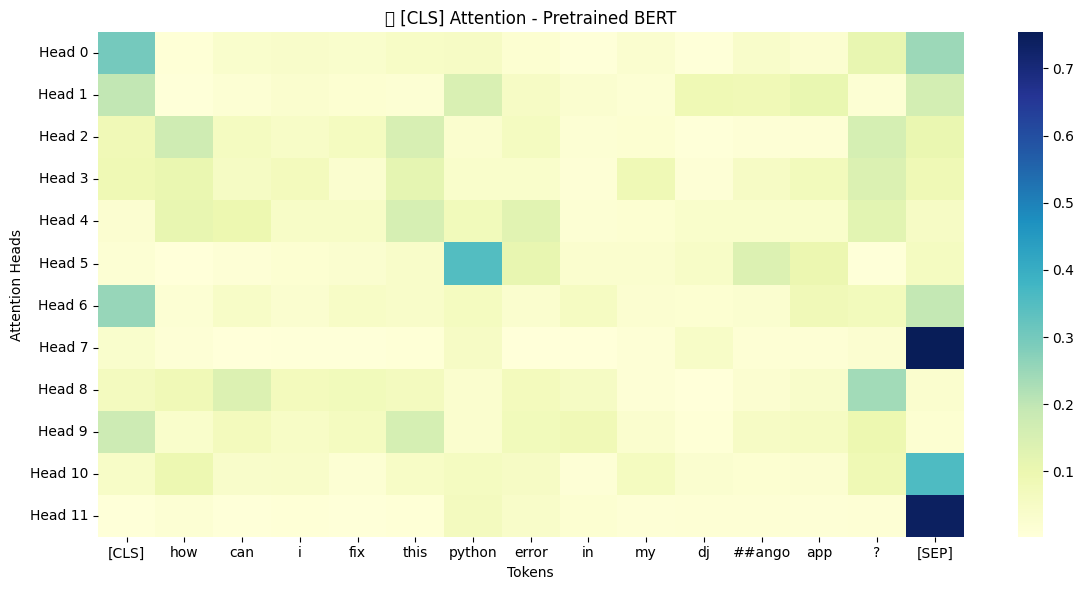

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17568\319649326.py:8: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


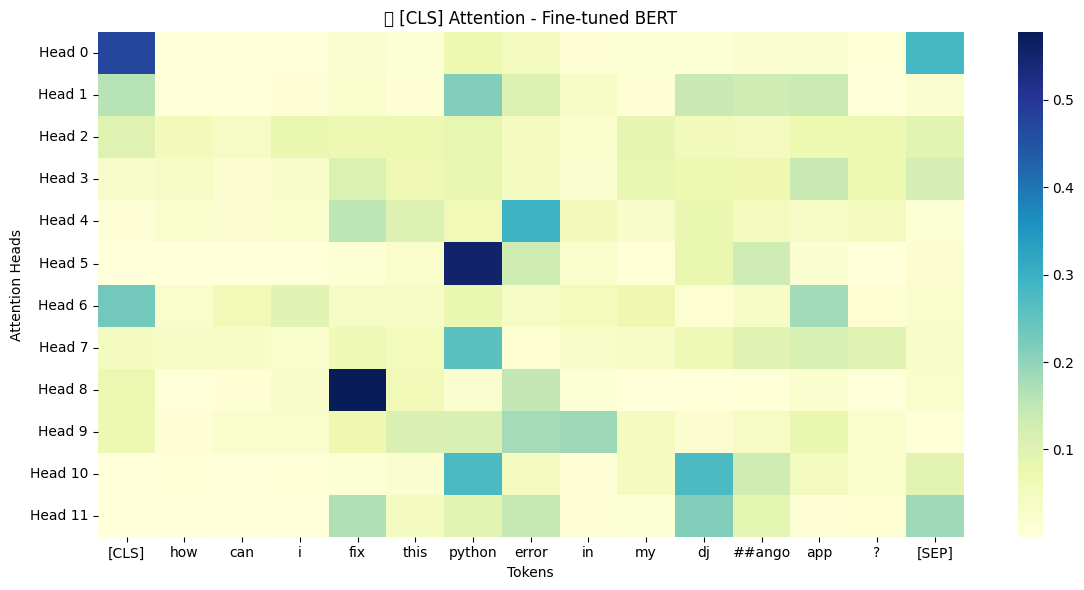

In [25]:
def plot_attention(attn, title):
    plt.figure(figsize=(12, 6))
    sns.heatmap(attn, xticklabels=tokens, yticklabels=[f'Head {i}' for i in range(12)],
                cmap="YlGnBu", cbar=True)
    plt.title(title)
    plt.xlabel("Tokens")
    plt.ylabel("Attention Heads")
    plt.tight_layout()
    plt.show()

plot_attention(cls_attn_pre, "🔵 [CLS] Attention - Pretrained BERT")
plot_attention(cls_attn_finetuned, "🟢 [CLS] Attention - Fine-tuned BERT")
